In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
#read the data set of "bank application data" in ad.
ad = pd.read_csv("application_data.csv")

In [4]:
#read the data set of "previous application" in ad.
pa = pd.read_csv("previous_application.csv")

In [5]:
# Checking the head of the dataset 'ad'
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#print the head of the data frame.
ad.shape

(307511, 122)

In [7]:
# Checking the columns for null percentage
ad.isna().sum()/len(ad)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
#finding the null value percentage in all columns
dropcol=ad.isnull().sum()/len(ad)*100
dropcol

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [9]:
# checking the columns having high null value(more than 25%) 
dropcol=ad.isnull().sum()
dropcol=list(dropcol[dropcol.values>=25].index)
len(dropcol)

64

In [10]:
#dropping the dropcol columns
ad.drop(labels=dropcol,axis=1,inplace=True)
ad.shape

(307511, 58)

In [11]:
# Checking the head again
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#dropping unused Columns
ad.drop(labels=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [13]:
#Checking the shape again
ad.shape

(307511, 28)

In [14]:
#Checking the head again
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [15]:
# again checking the mising value in dataset
ad.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
dtype: int64

In [16]:
# there are 12 missing values in "AMT_ANNUITY", so need to treat those missing values
#taking a closer look into the "AMT_ANNUITY"
ad.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [17]:
# Finding the median of amount annuity
ad.AMT_ANNUITY.median()

24903.0

In [18]:
# Filling the missing value with the median in AMT_ANNUITY
ad.AMT_ANNUITY.fillna(ad.AMT_ANNUITY.median(), inplace= True)

In [19]:
# again checking the mising value in dataset
ad.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

In [20]:
# checking the data types of all columns
ad.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [21]:
# Analysing the AMT_INCOME_TOTAL using describe function
ad.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

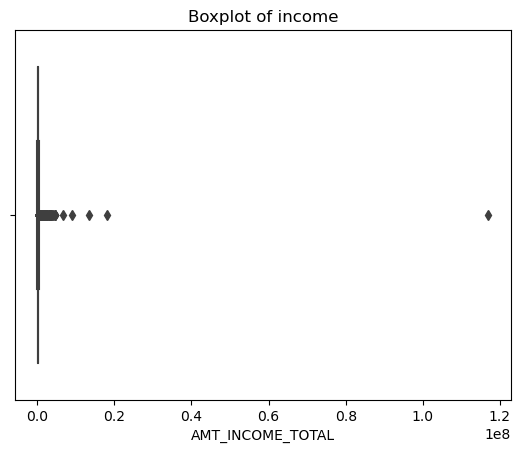

In [22]:
# Checking for outliers in AMT_INCOME_TOTAL using boxplot
sns.boxplot(ad.AMT_INCOME_TOTAL)
plt.title('Boxplot of income')
plt.show()

In [23]:
# Capping outliers for AMT_INCOME_TOTAL
a = ad.AMT_INCOME_TOTAL.quantile(0.75)
ad["AMT_INCOME_TOTAL"] = ad["AMT_INCOME_TOTAL"].apply(lambda x: a if x> a else x)

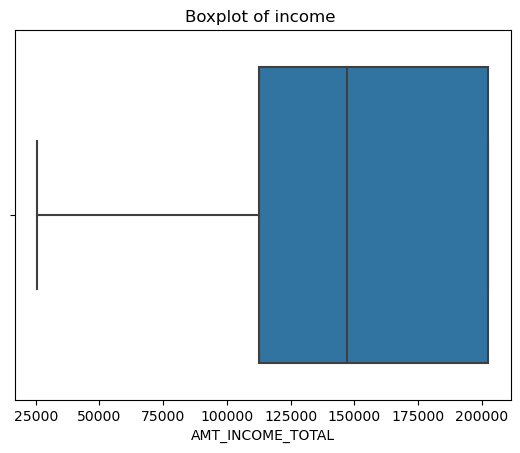

In [24]:
# Checking for outliers again in AMT_INCOME_TOTAL using boxplot
sns.boxplot(ad.AMT_INCOME_TOTAL)
plt.title('Boxplot of income ')
plt.show()

In [25]:
# Analysing the AMT_CREDIT using describe function
ad.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

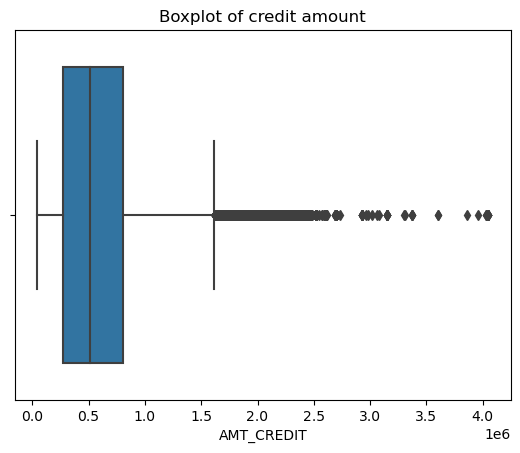

In [26]:
# Checking for outliers again in AMT_CREDIT using boxplot
sns.boxplot(ad.AMT_CREDIT)
plt.title('Boxplot of credit amount')
plt.show()

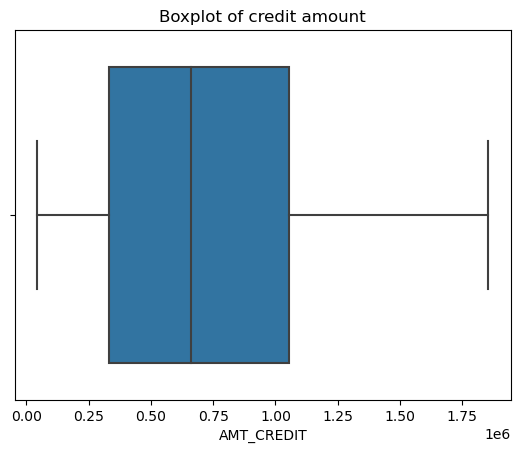

In [27]:
# binning outliers using binning 
sns.boxplot(ad.AMT_CREDIT.quantile([0,0.25,0.5,0.75,0.9,0.99]))
plt.title('Boxplot of credit amount')
plt.show()

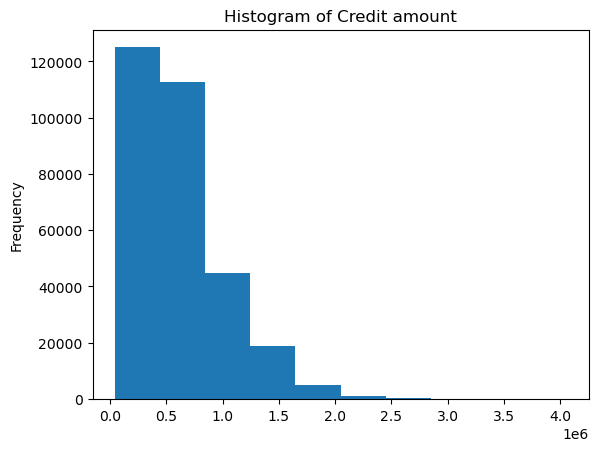

In [28]:
# visualizing the histogram for "Credit Amount"
ad.AMT_CREDIT.plot.hist()
plt.title('Histogram of Credit amount')
plt.show()

In [29]:
# Analysing REGION_POPULATION_RELATIVE column for mean and median values
ad.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

There are some values in different columns those have "XNA" values which are need to be treated


In [30]:
# for "CODE_GENDER" 
ad['CODE_GENDER'].value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
# Updating the values in 'CODE_GENDER' with "F" as "F" is the modal result in it

ad.loc[ad['CODE_GENDER']=='XNA','CODE_GENDER']='F'

# again checking the value_counts
ad['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [32]:
# for "ORGANIZATION_TYPE" 
ad['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [33]:
# Updating the values in 'ORGANIZATION_TYPE' with "Unknown" as it has a large number of data

ad.loc[ad['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='Unknown'

# again checking the value_counts
ad['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [34]:
# Converting AMT_ANNUITY into numeric
ad.AMT_ANNUITY.describe()
ad["AMT_ANNUITY"]
ad["AMT_ANNUITY"] = pd.to_numeric(ad["AMT_ANNUITY"])

In [35]:
# Checking the data types of all columns in ad dataset
ad.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

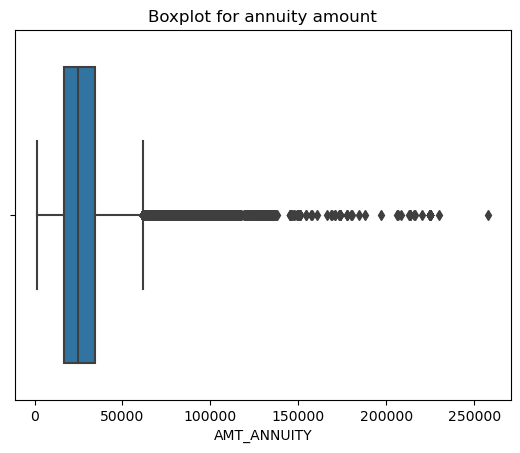

In [36]:
# Checking for the outliers in AMT_ANNUITY
sns.boxplot(ad.AMT_ANNUITY)
plt.title('Boxplot for annuity amount')
plt.show()

In [37]:
# Capping outliers for AMT_ANNUITY
b = ad.AMT_ANNUITY.quantile(0.75)
ad["AMT_ANNUITY"] = ad["AMT_ANNUITY"].apply(lambda x: b if x> b else x)

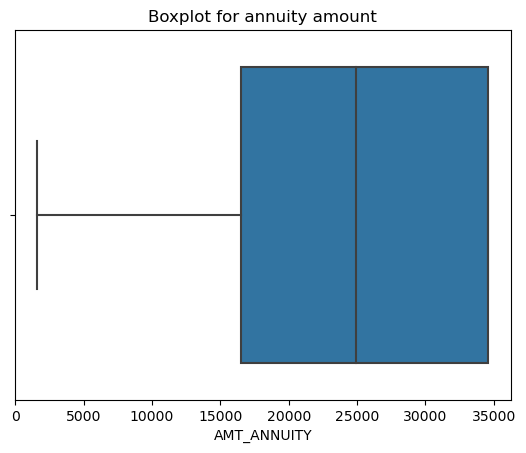

In [38]:
# Checking for the outliers in AMT_ANNUITY again
sns.boxplot(ad.AMT_ANNUITY)
plt.title('Boxplot for annuity amount')
plt.show()

After Handeling the missing values, outliers and unwanted columns and understanding the problem, I may start the analysis step by step considering the followings Variables:
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. NAME_INCOME_TYPE
5. NAME_EDUCATION_TYPE
6. ORGANIZATION_TYPE
7. CODE_GENDER
8. TARGET

Before starting the analysis, it is essential to Create bins for continous variable type columns ("AMT_INCOME_TOTAL"& "AMT_CREDIT")

In [39]:
# Checking the minimum and maximum values of "AMT_INCOME_TOTAL"
ad.AMT_INCOME_TOTAL.describe()

count    307511.000000
mean     146545.772138
std       47357.085573
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      202500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [40]:
# Making the bins for "AMT_INCOME_TOTAL"
bins = [0,30000,60000,90000,120000,150000,180000,210000]
slot = ['0-30000', '30000-60000','60000-90000','90000,120000','120000-150000', '150000-180000', '180000-210000']

ad['AMT_INCOME_RANGE']=pd.cut(ad['AMT_INCOME_TOTAL'],bins,labels=slot)

In [41]:
# Checking the minimum and maximum values of "AMT_CREDIT"
ad.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [42]:
# Creating the bins using Quantiles
ad.AMT_CREDIT.quantile([0,0.25,0.5,0.75,0.9,1.00])

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.90    1133748.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [43]:
# Making the bins for "AMT_CREDIT"

bins = [0,270000,513531,808650,1133748,4050000]
slots = ['<270000', '270000 - 513531', '513531 - 808650', '808650 - 1133748', '1133748+']

# Creating another column for 'AMT_CREDIT_RANGE'
ad['AMT_CREDIT_RANGE']=pd.cut(ad['AMT_CREDIT'],bins=bins,labels=slots)

In [44]:
# Checking for the statistial data for AMT_ANNUITY
ad.AMT_ANNUITY.describe()

count    307511.000000
mean      24105.358080
std        8978.714271
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       34596.000000
Name: AMT_ANNUITY, dtype: float64

In [45]:
# Making the bins for "AMT_ANNUITY_RANGE"

bins = [0,5000,10000,15000,20000,25000,30000,35000]
slots = ['< 5000', '5000 - 10000', '10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', '30000 - 35000']

# Creating another column for 'AMT_CREDIT_RANGE'
ad['AMT_ANNUITY_RANGE']=pd.cut(ad['AMT_ANNUITY'],bins=bins,labels=slots)

In [46]:
#veryfying the newly added columns
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,180000-210000,270000 - 513531,20000 - 25000
1,100003,0,Cash loans,F,N,N,0,202500.0,1293502.5,34596.0,...,0,0,0,0,0,0,School,180000-210000,1133748+,30000 - 35000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,60000-90000,<270000,5000 - 10000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,120000-150000,270000 - 513531,25000 - 30000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,120000-150000,270000 - 513531,20000 - 25000


In [47]:
# Generating two different datasets for target=1(client with payment difficulties) and target=0(all other)

ad_t0=ad.loc[ad["TARGET"]==0]
ad_t1=ad.loc[ad["TARGET"]==1]

In [48]:
# Checking the shape of all other catagory 
ad_t0.shape

(282686, 31)

In [49]:
# Checking the shape of client with payment difficulties catagory
ad_t1.shape

(24825, 31)

In [50]:
# Checking the head of all other catagory
ad_t0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
1,100003,0,Cash loans,F,N,N,0,202500.0,1293502.5,34596.0,...,0,0,0,0,0,0,School,180000-210000,1133748+,30000 - 35000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,60000-90000,<270000,5000 - 10000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,120000-150000,270000 - 513531,25000 - 30000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,120000-150000,270000 - 513531,20000 - 25000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,Other,"90000,120000",270000 - 513531,25000 - 30000


# Univariate Analysis

In [51]:
# finding the percentage of 0 and 1 type catagories 
ad.TARGET.value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

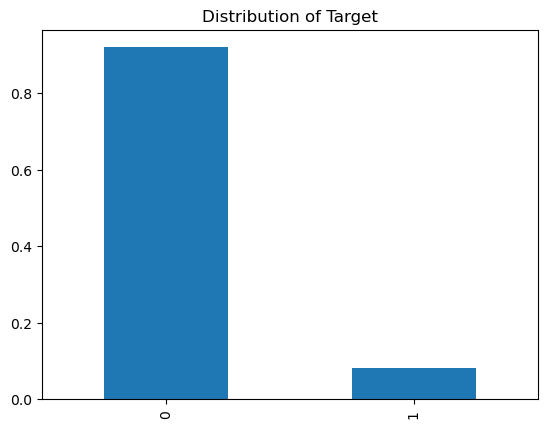

In [52]:
# Visualizing the proportion of 0 and 1 type catagories 
ad.TARGET.value_counts(normalize = True).plot.bar()
plt.title('Distribution of Target')
plt.show()

In [53]:
# Finding the gender percentage for 0 type person
ad_t0.CODE_GENDER.value_counts(normalize=True)*100

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

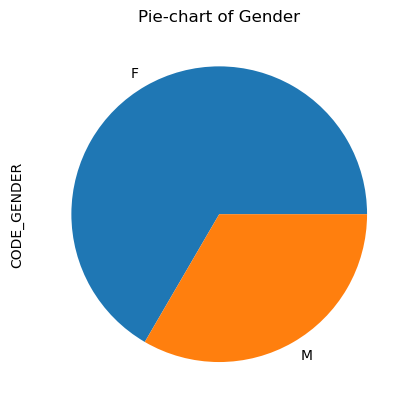

In [54]:
# Visualizing the proportion of gender percentage for 0 type person
ad_t0.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('Pie-chart of Gender')
plt.show()

In [55]:
# # Finding the organization catagory percentage for 0 type person
ad_t0.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    21.815371
Unknown                   18.530808
Self-employed             12.205769
Other                      5.450571
Medicine                   3.698804
Government                 3.423587
Business Entity Type 2     3.414743
School                     2.959821
Trade: type 7              2.508437
Kindergarten               2.262581
Construction               2.099856
Business Entity Type 1     1.944560
Transport: type 4          1.732311
Industry: type 9           1.111834
Trade: type 3              1.107589
Industry: type 3           1.036486
Security                   1.034009
Housing                    0.963260
Military                   0.884020
Industry: type 11          0.873761
Bank                       0.840862
Police                     0.786739
Agriculture                0.777187
Transport: type 2          0.718819
Postal                     0.698655
Security Ministries        0.664341
Trade: type 2              0.625075
Restaurant                 0

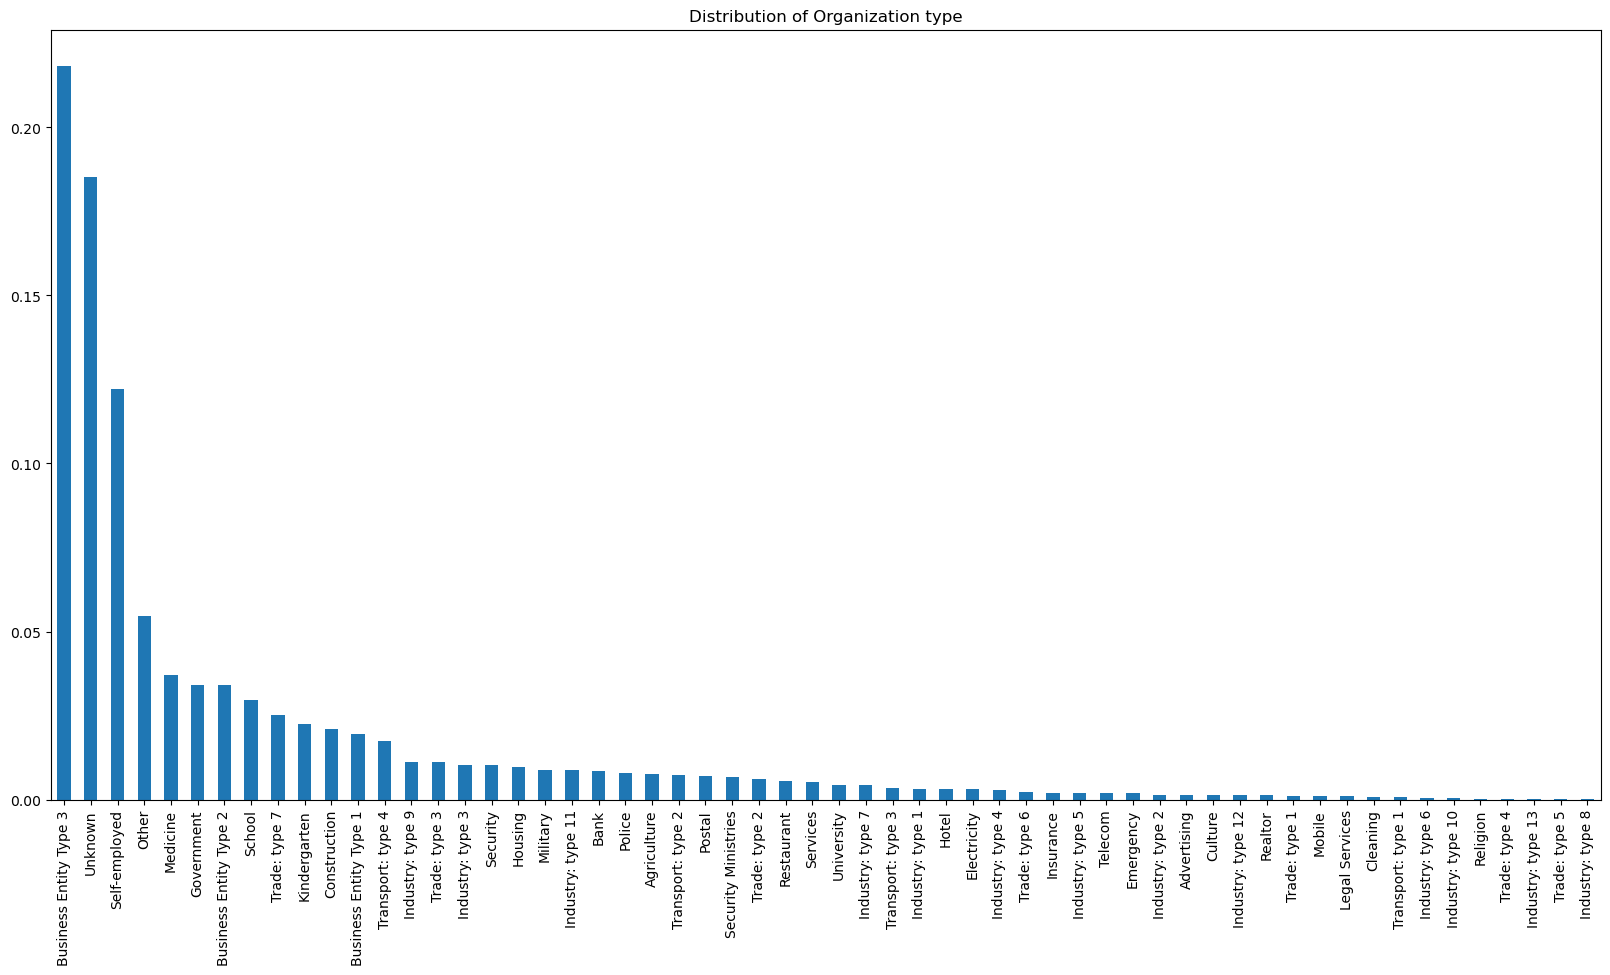

In [56]:
# Visualizing the organization catagory proportion for 0 type person
plt.figure(figsize = (20,10))
ad_t0.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of Organization type')
plt.show()

In [57]:
# Finding the education catagory percentage for 0 type person
ad_t0.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

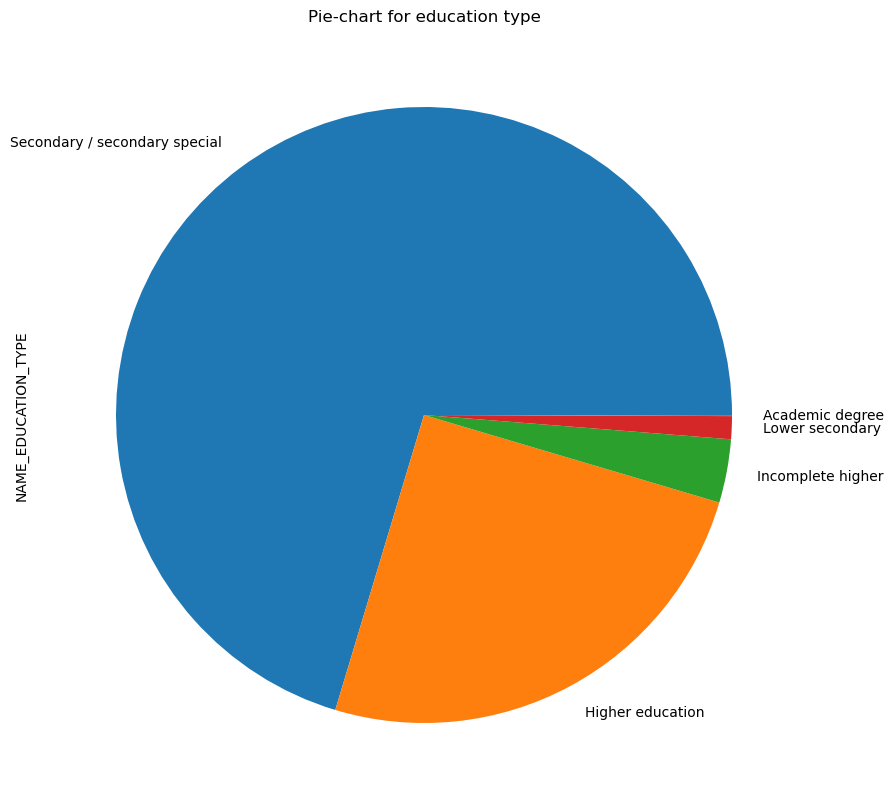

In [58]:
## Visualizing the education catagory proportion for 0 type person
plt.figure(figsize = (10,10))
ad_t0.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.pie()
plt.title('Pie-chart for education type')
plt.show()

In [59]:
# Finding the income catagory percentage for 0 type person
ad_t0.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

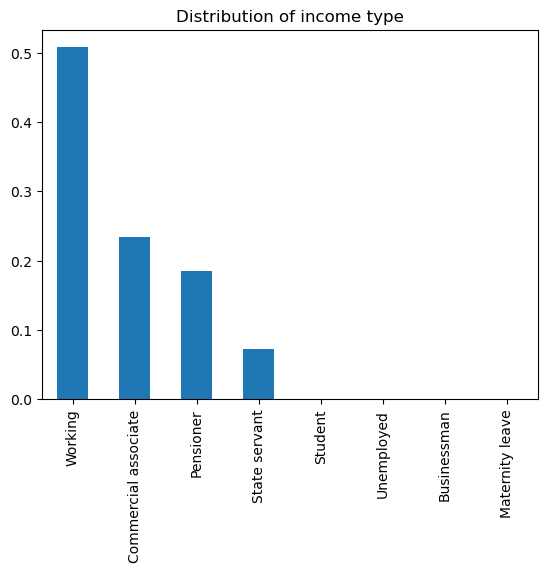

In [60]:
## Visualizing the income type catagory proportion for 0 type person
ad_t0.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of income type')
plt.show

In [61]:
# Finding the amount credit range percentage for 0 type person
ad_t0.AMT_CREDIT_RANGE.value_counts(normalize = True)*100


<270000             25.732084
513531 - 808650     24.995932
270000 - 513531     24.098823
808650 - 1133748    14.927517
1133748+            10.245644
Name: AMT_CREDIT_RANGE, dtype: float64

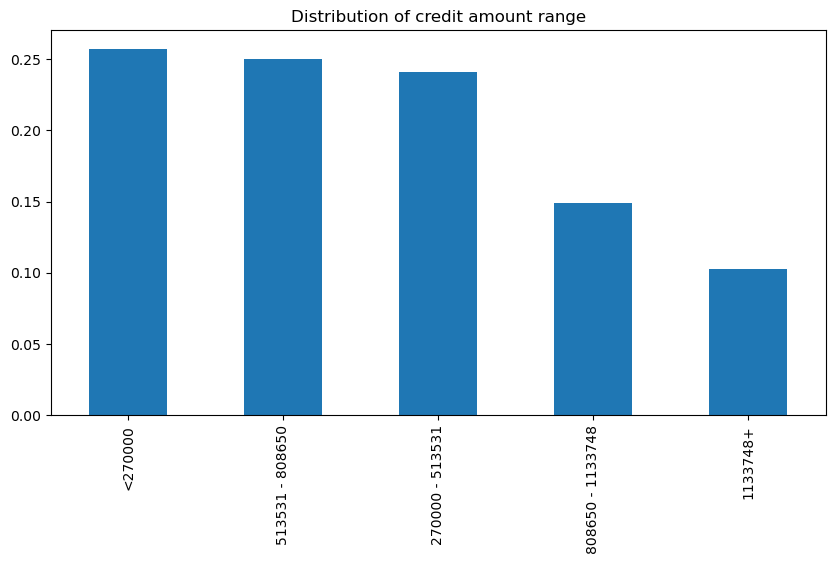

In [62]:
## Visualizing the amount credit range proportion for 0 type person
plt.figure(figsize = (10,5))
ad_t0.AMT_CREDIT_RANGE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of credit amount range')
plt.show()

In [63]:
# Finding the income range percentage for 0 type person
ad_t0.AMT_INCOME_RANGE.value_counts(normalize = True)*100


180000-210000    30.194987
150000-180000    19.512463
120000-150000    16.809817
60000-90000      16.015650
90000,120000     14.667511
30000-60000       2.752524
0-30000           0.047049
Name: AMT_INCOME_RANGE, dtype: float64

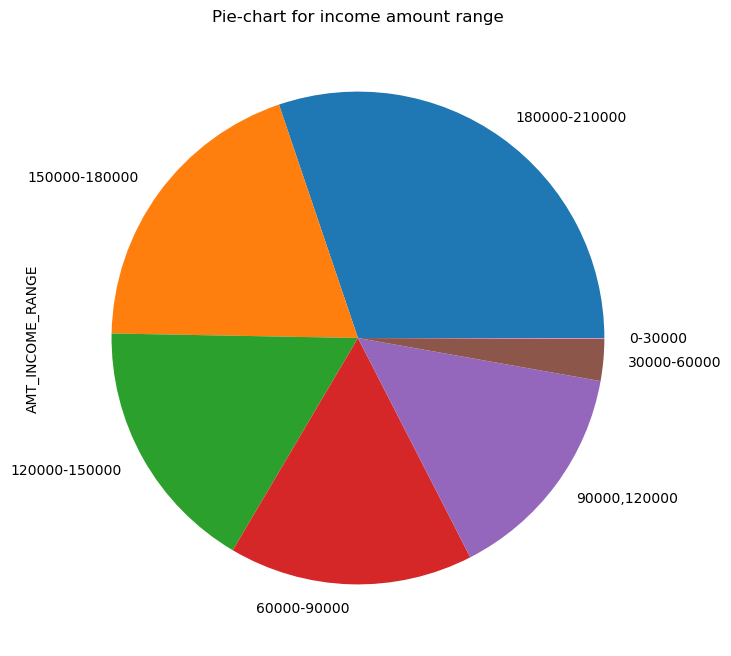

In [64]:
## Visualizing the income range proportion for 0 type person
plt.figure(figsize = (10,8))
ad_t0.AMT_INCOME_RANGE.value_counts(normalize = True).plot.pie()
plt.title('Pie-chart for income amount range')
plt.show()

In [65]:
# Finding the amount annuity range percentage for 0 type person
ad_t0.AMT_ANNUITY_RANGE.value_counts(normalize = True)*100

30000 - 35000    35.390858
20000 - 25000    15.643152
25000 - 30000    14.149622
15000 - 20000    13.862731
10000 - 15000    13.300977
5000 - 10000      7.271319
< 5000            0.381342
Name: AMT_ANNUITY_RANGE, dtype: float64

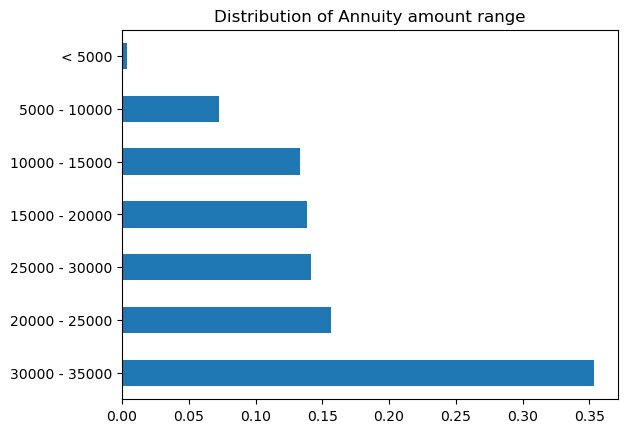

In [66]:
## Visualizing the amount annuity proportion for 0 type person
ad_t0.AMT_ANNUITY_RANGE.value_counts(normalize = True).plot.barh()
plt.title('Distribution of Annuity amount range')
plt.show()

##### After performing the Univariate Analysis, it can be concluded that:

    1. 91.92 % of the person have no difficulties in payment of the loan
    
    2. Out of them 66.6 % of person is Female
    
    3. 'Business Entity Type 3' type persons are the best fitted organization for targeting
    
    4. Person with Secondary / secondary special type of education are the best choice for targeting
    
    5. More than 50 % people of the targetted person are working
    
    6. Credit amount for the loan should be less than Rs.500000
    
    7. Loan should be approved for those people who have income ranging between Rs.180000- Rs.210000
    
    8. Loan Annuity between Rs.30000 - Rs.35000 is the best fitted case amoung all

# Bivariate Analysis

It deals with the correlation matrix, scatter plot, pair plot, bar plot, etc between different fields with targeted variable.
Variables are as follows:

1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. NAME_INCOME_TYPE
5. NAME_EDUCATION_TYPE
6. ORGANIZATION_TYPE
7. CODE_GENDER
8. NAME_FAMILY_STATUS
9. TARGET

In [67]:
# Checking the statistical results of 'TARGET' with respect to  total income 
ad.groupby("TARGET")["AMT_INCOME_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,146750.279542,47434.834745,25650.0,112500.0,148500.0,202500.0,202500.0
1,24825.0,144217.015650,46399.978470,25650.0,112500.0,135000.0,202500.0,202500.0


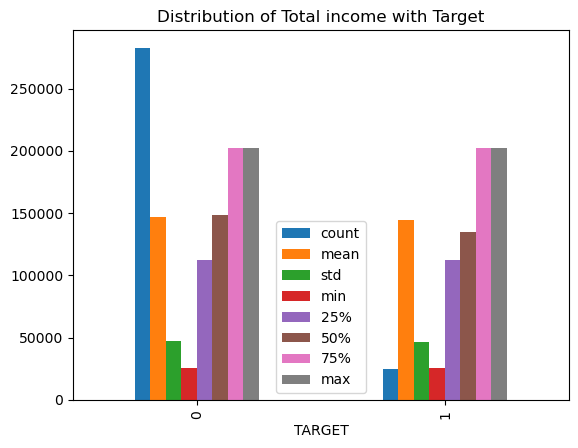

In [68]:
# Visualizing the statistical results of 'TARGET' with respect to  total income 
ad.groupby("TARGET")["AMT_INCOME_TOTAL"].describe().plot.bar()
plt.title('Distribution of Total income with Target')
plt.show()

conclusion of the above analysis

There are few persons those have difficulties in payment, maximum of the persons are catagorised in 'TARGET 0' type.
Average income of the parson in 'TARGET 0' is slightly higher than that in 'TARGET 1'

In [69]:
# Checking the statistical results of 'TARGET' with respect to  'Amount Credit'
ad.groupby("TARGET")["AMT_CREDIT"].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,602648.282002,406845.907710,45000.0,270000.0,517788.0,810000.0,4050000.0
1,24825.0,557778.527674,346433.235646,45000.0,284400.0,497520.0,733315.5,4027680.0


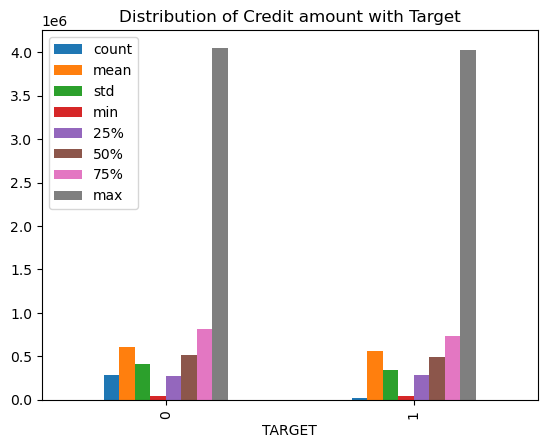

In [70]:
# Visualizing the statistical results of 'TARGET' with respect to  'Amount Total'
ad.groupby("TARGET")["AMT_CREDIT"].describe().plot.bar()
plt.title('Distribution of Credit amount with Target')
plt.show()

Conclusion based on above analysis
Average amount credited for the parson in 'TARGET 0' is slightly higher than that in 'TARGET 1'

In [71]:
# Checking the statistical results of 'TARGET' with respect to  'Amount Annuity'
ad.groupby("TARGET")["AMT_ANNUITY"].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,282686.0,24087.143311,9012.808293,1615.5,16456.5,24876.0,34596.0,34596.0
1,24825.0,24312.772387,8578.378875,2722.5,17361.0,25263.0,32976.0,34596.0


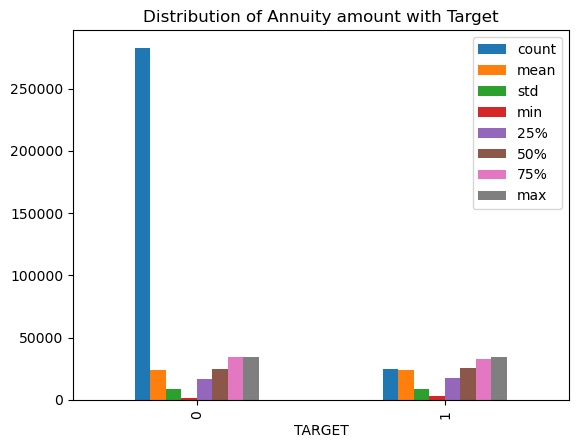

In [72]:
# Visualizing the statistical results of 'TARGET' with respect to  'Amount Annuity'
ad.groupby("TARGET")["AMT_ANNUITY"].describe().plot.bar()
plt.title('Distribution of Annuity amount with Target')
plt.show()

Conclusion based on above analysis
Average amount annuity for the parson in 'TARGET 1' is slightly higher than that in 'TARGET 0'

In [73]:
# Checking the statistical results of 'TARGET' with respect to  'Income Type'
ad.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts(normalize = True)*100

NAME_INCOME_TYPE      TARGET
Businessman           0         100.000000
Commercial associate  0          92.515743
                      1           7.484257
Maternity leave       0          60.000000
                      1          40.000000
Pensioner             0          94.613634
                      1           5.386366
State servant         0          94.245035
                      1           5.754965
Student               0         100.000000
Unemployed            0          63.636364
                      1          36.363636
Working               0          90.411528
                      1           9.588472
Name: TARGET, dtype: float64

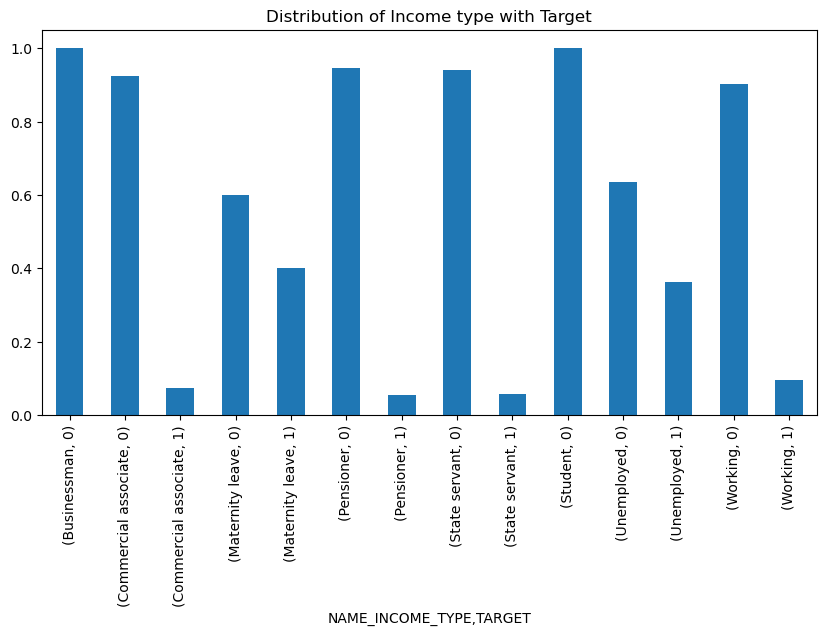

In [74]:
# Visualizing the statistical results of 'TARGET' with respect to  'Income Type'
plt.figure(figsize=(10,5))
ad.groupby("NAME_INCOME_TYPE")["TARGET"].value_counts(normalize = True).plot.bar()
plt.title('Distribution of Income type with Target')
plt.show()

Conclusion based on above analysis
Businessman, Commercial associate, Pensioner, State servant, students are the good choice for aproving the loan amount  

In [75]:
# Checking the statistical results of 'TARGET' with respect to  'Education Type'
ad.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts(normalize = True)*100

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         98.170732
                               1          1.829268
Higher education               0         94.644885
                               1          5.355115
Incomplete higher              0         91.515034
                               1          8.484966
Lower secondary                0         89.072327
                               1         10.927673
Secondary / secondary special  0         91.060071
                               1          8.939929
Name: TARGET, dtype: float64

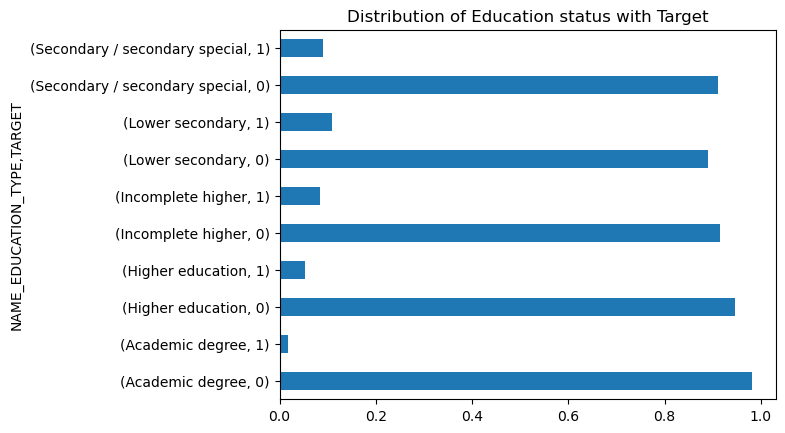

In [76]:
# Visualizing the statistical results of 'TARGET' with respect to  'Education Type'
ad.groupby("NAME_EDUCATION_TYPE")["TARGET"].value_counts(normalize = True).plot.barh()
plt.title('Distribution of Education status with Target')
plt.show()

Conclusion after the above analysis

All types of education level other than lower secondary can be treated as good choice for loan approvation 

In [77]:
# Checking the statistical results of 'TARGET' with respect to  'Organization Type'
c = ad_t0.groupby("ORGANIZATION_TYPE")["TARGET"].value_counts()
print(c[c > 30000])

ORGANIZATION_TYPE       TARGET
Business Entity Type 3  0         61669
Self-employed           0         34504
Unknown                 0         52384
Name: TARGET, dtype: int64


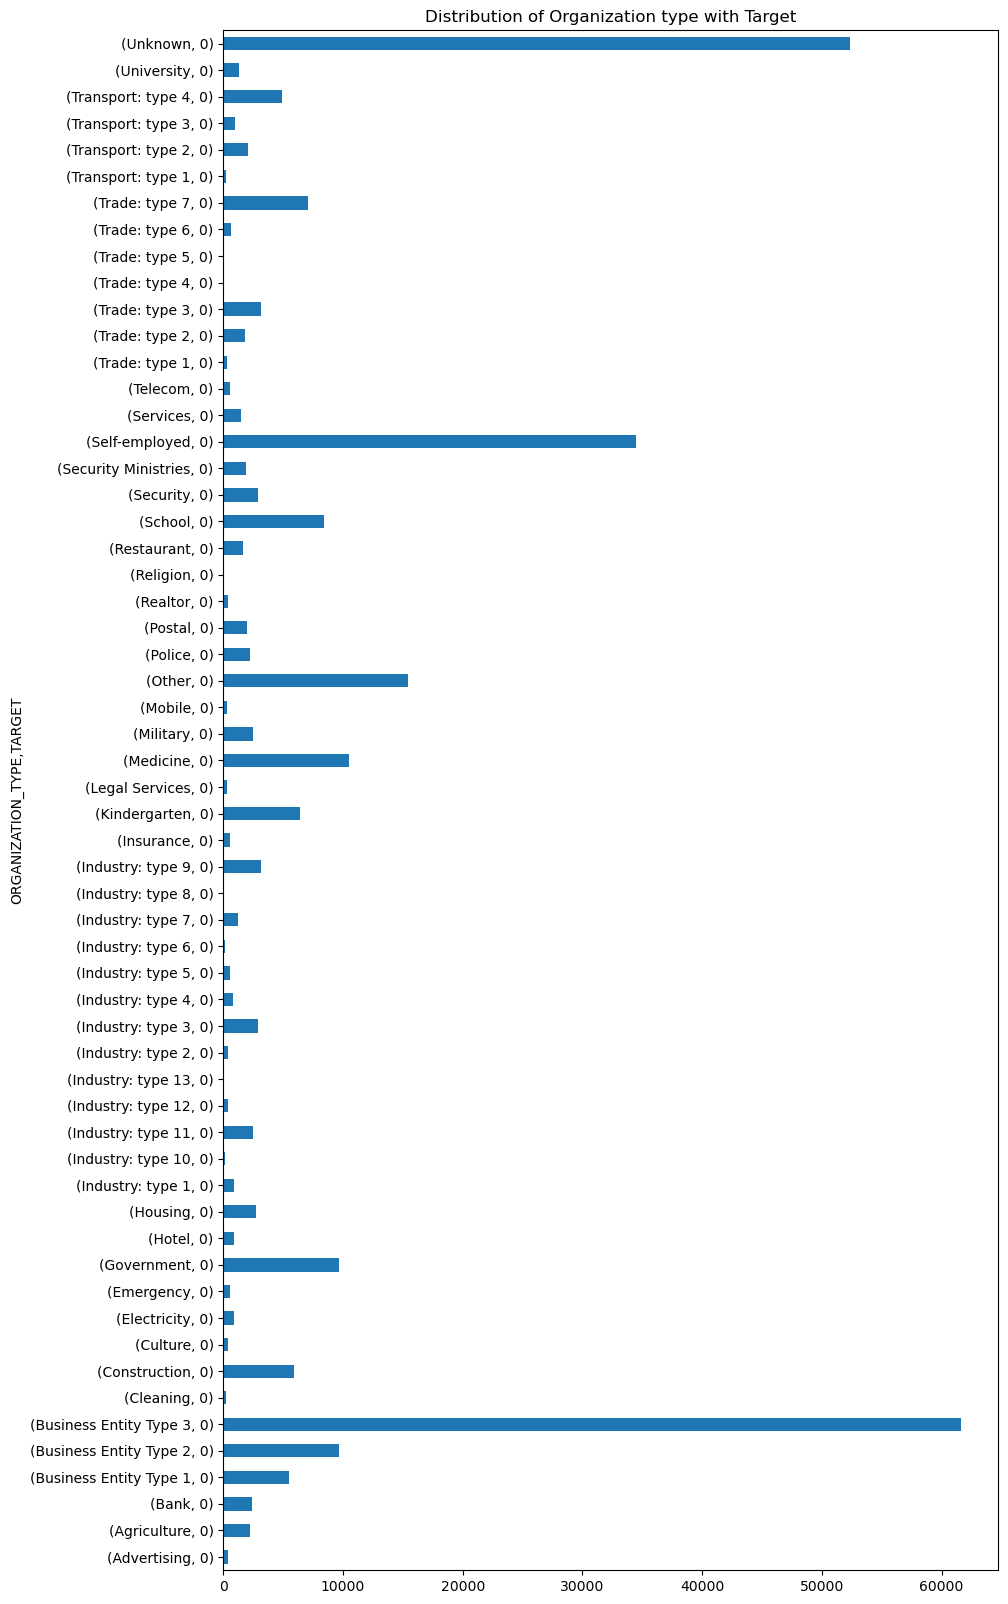

In [78]:
# Visualizing the statistical results of 'TARGET' with respect to  'Organization Type'
plt.figure(figsize=(10,20))
ad_t0.groupby("ORGANIZATION_TYPE")["TARGET"].value_counts().plot.barh()
plt.title('Distribution of Organization type with Target')
plt.show()

Conclusion based on above analysis
Business Entity Type, Self-employed persons are two best choice for approving the loan.

In [79]:
# Checking the statistical results of 'TARGET' with respect to  'Gender'
ad.groupby("CODE_GENDER")["TARGET"].value_counts(normalize = True)

CODE_GENDER  TARGET
F            0         0.930008
             1         0.069992
M            0         0.898581
             1         0.101419
Name: TARGET, dtype: float64

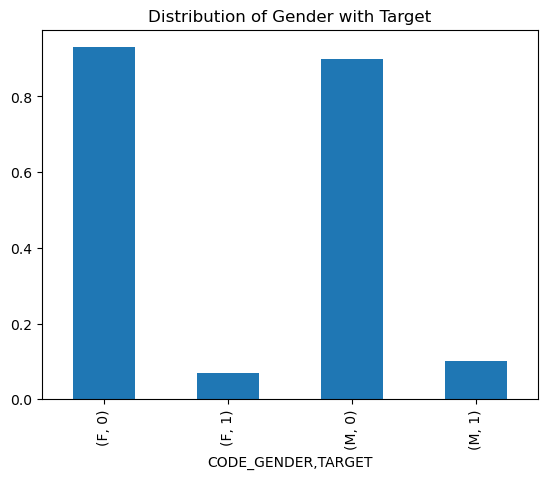

In [80]:
# Visualizing the statistical results of 'TARGET' with respect to  'Gender'
ad.groupby("CODE_GENDER")["TARGET"].value_counts(normalize = True).plot.bar()
plt.title('Distribution of Gender with Target')
plt.show()

Conclusion after the analysis

Females have the better history for loan payment

In [81]:
# Checking the statistical results of 'TARGET' with respect to  'FAMILY_STATUS'
ad.groupby("NAME_FAMILY_STATUS")["TARGET"].value_counts(normalize = True)*100

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          90.055416
                      1           9.944584
Married               0          92.440132
                      1           7.559868
Separated             0          91.805766
                      1           8.194234
Single / not married  0          90.192325
                      1           9.807675
Unknown               0         100.000000
Widow                 0          94.175783
                      1           5.824217
Name: TARGET, dtype: float64

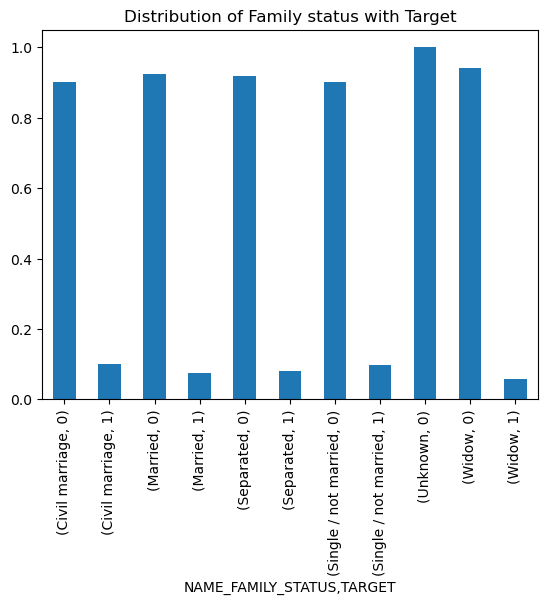

In [82]:
# Visualizing the statistical results of 'TARGET' with respect to  'FAMILY_STATUS'
ad.groupby("NAME_FAMILY_STATUS")["TARGET"].value_counts(normalize = True).plot.bar()
plt.title('Distribution of Family status with Target')
plt.show()

Conclusion made after above results

All type of Family status results more than 90% positive response in loan payment

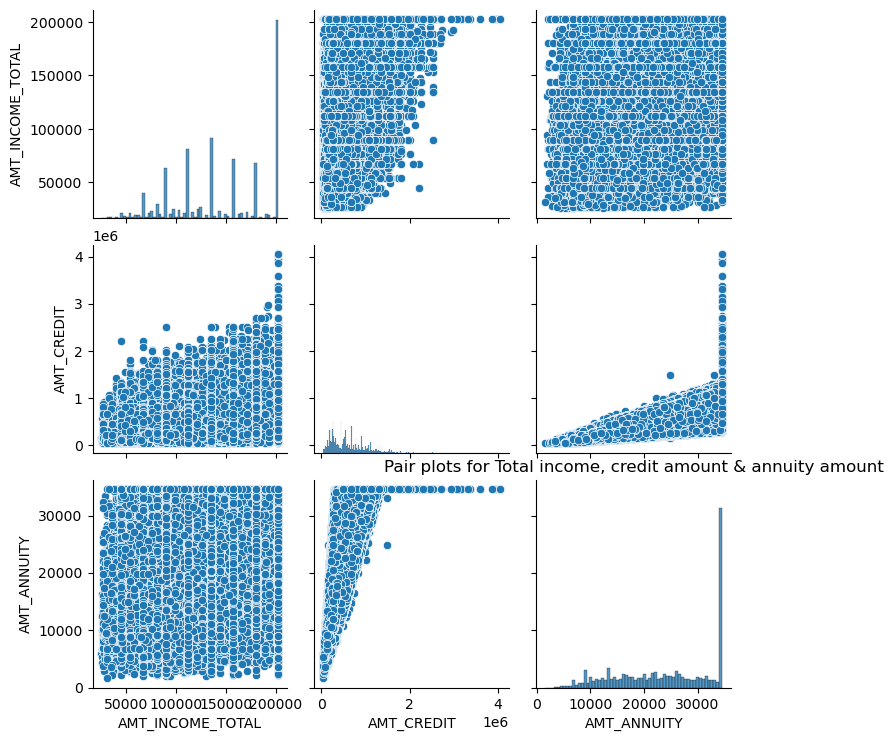

In [83]:
# Visualizing the paiplot between three variables 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY' only for 'Target 0'  
sns.pairplot(data = ad_t0 , vars = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])
plt.title('Pair plots for Total income, credit amount & annuity amount')
plt.show()

Conclusions after above analysis

1. Total income is uniformly distributed with all values of Annuity amount
2. Maximum persons are with lower credit amount with respect to Annuity amount as well as Total income


# Multivariate Analysis

The below analysis are based on the consideration  for only those persons who belong to 'Target 0' class

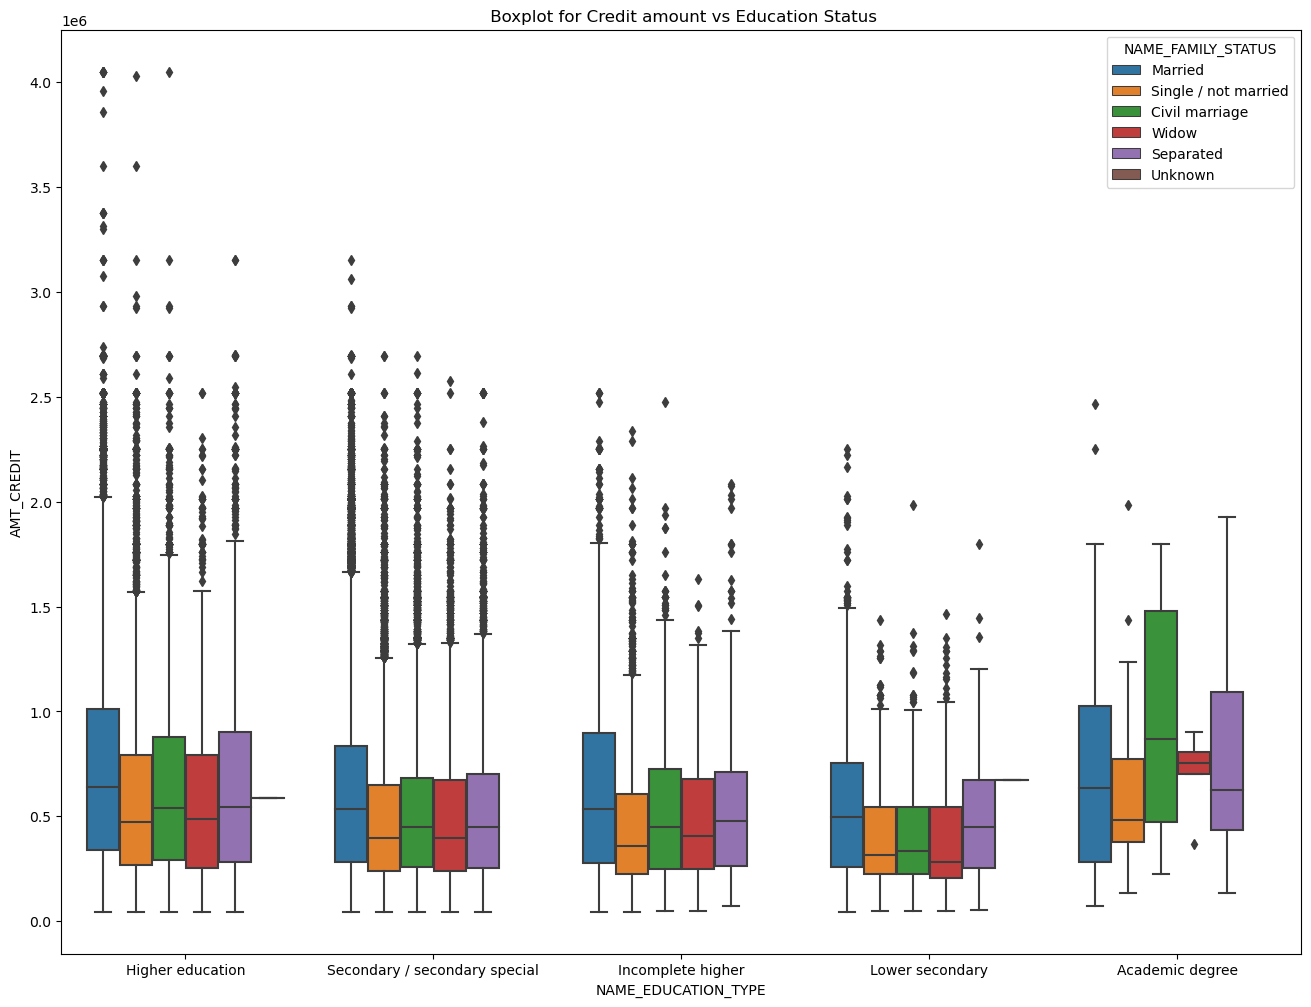

In [84]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =ad_t0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title(' Boxplot for Credit amount vs Education Status')
plt.show()

Conclusion on the above analysis:
Civi Marraige with Academic Degree got the highest average credit amount of loan

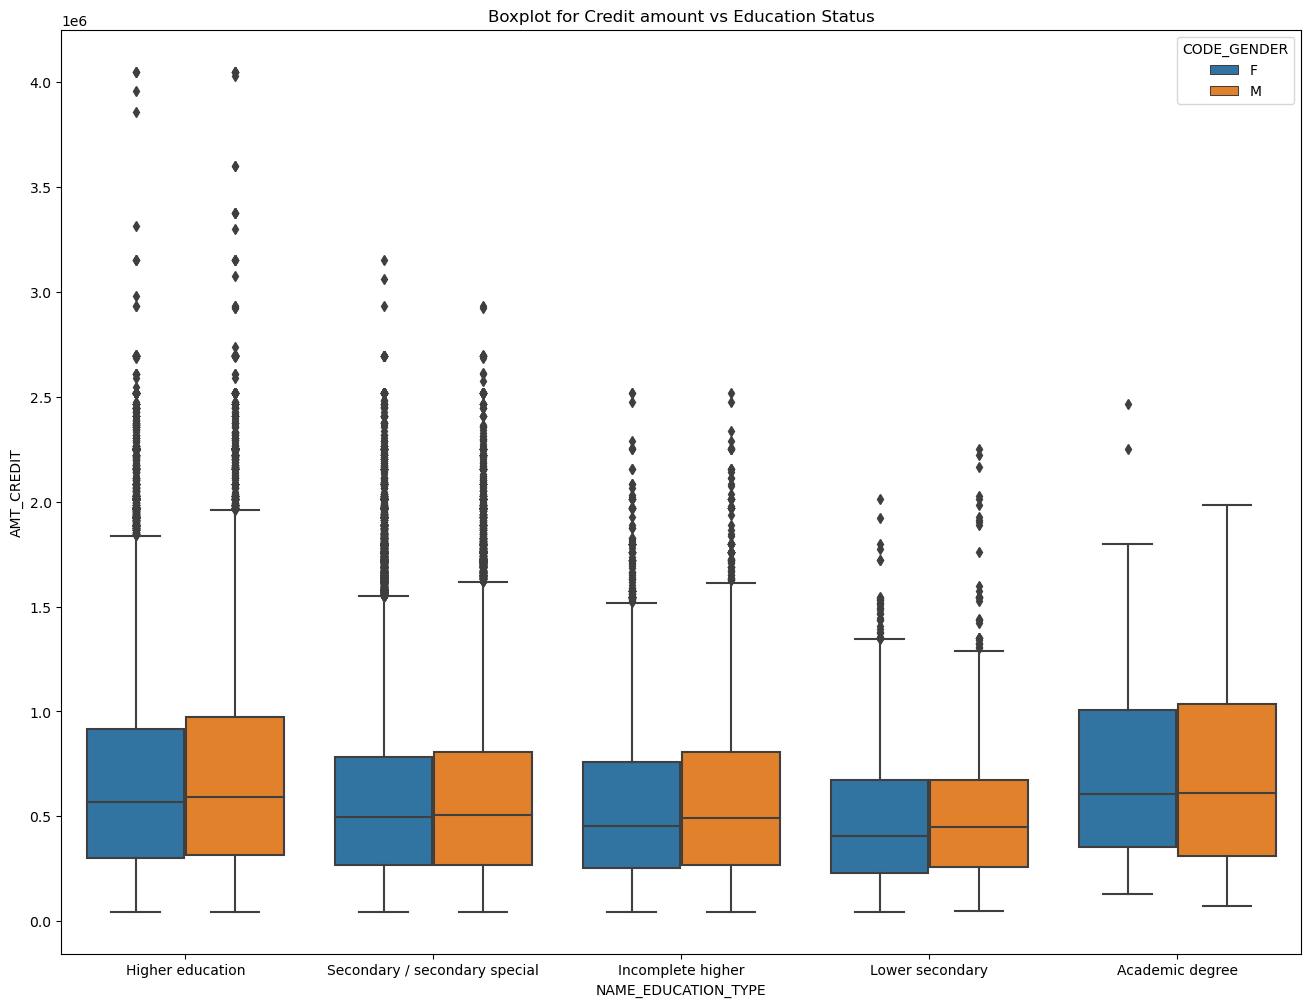

In [85]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =ad_t0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER',orient='v')
plt.title('Boxplot for Credit amount vs Education Status')
plt.show()

Conclusion on the above analysis:
    Credit amount for Higher education and Academic Degree is higher than any other catagory for both the gender.

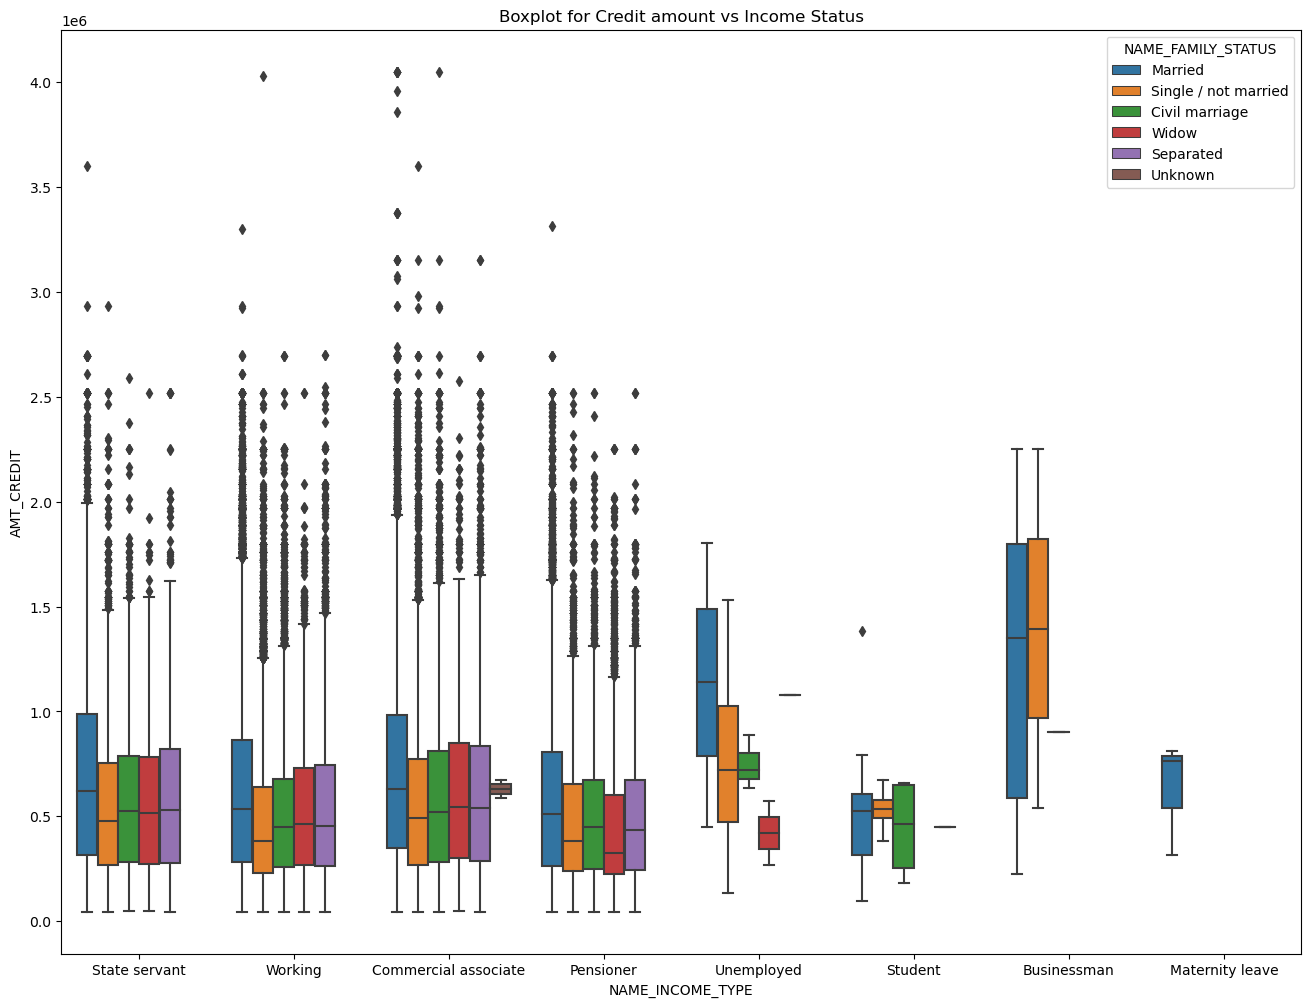

In [86]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =ad_t0, x='NAME_INCOME_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Boxplot for Credit amount vs Income Status')
plt.show()

Conclusion on the above analysis:
    Single bussinessman got maximum credit for loan.
    However, overall  Married got higher than any other catagories.

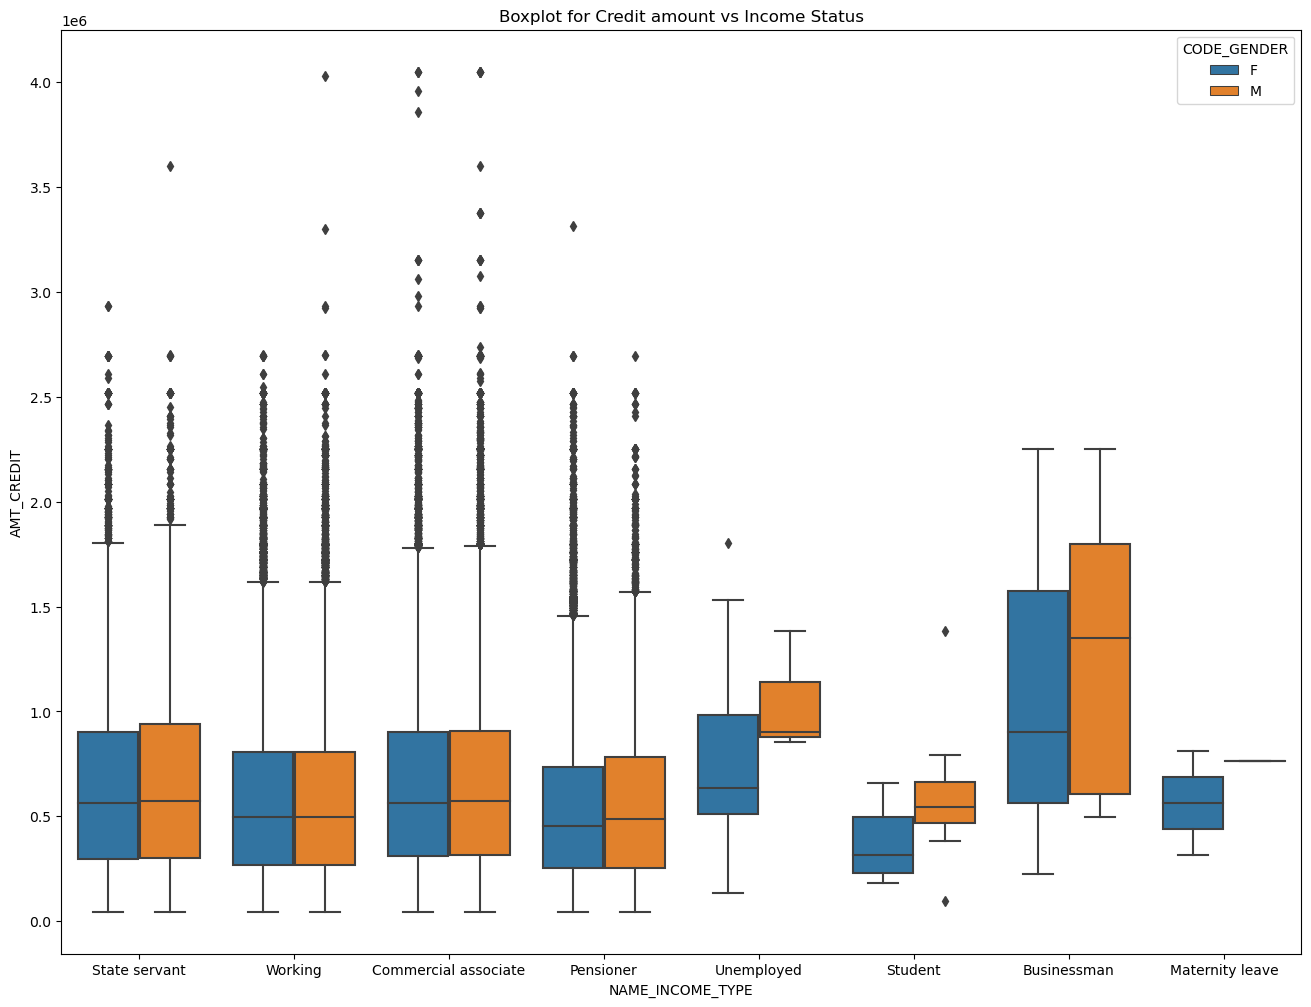

In [87]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
sns.boxplot(data =ad_t0, x='NAME_INCOME_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER',orient='v')
plt.title('Boxplot for Credit amount vs Income Status')
plt.show()

Conclusion on the above analysis:
    Generally Male bussinessman got highest average loan amount while female student got lowest average of credit amount.

In [88]:
# Creating pivot table for index = 'CODE_GENDER', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT'
pd.pivot_table(data = ad_t0, index = 'CODE_GENDER', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT' )

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
CODE_GENDER,,,,,,,,
F,1.125000e+06,668840.474033,562500.0,535162.152494,665131.932640,372556.285714,7.879091e+05,577837.993843
M,1.272857e+06,685304.420401,765000.0,571540.005875,695356.715702,598752.818182,1.045500e+06,587183.081629


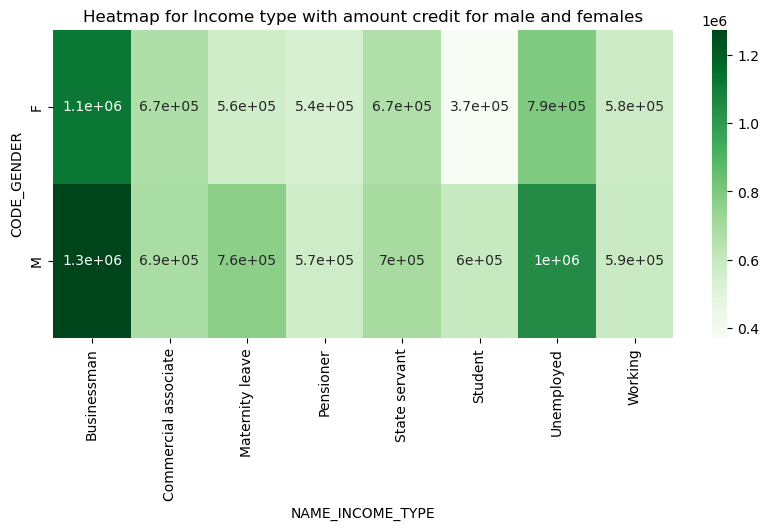

In [89]:
# Visualizing heatmap for the previous pivot table
plt.figure(figsize=(10,4))
d = pd.pivot_table(data = ad_t0, index = 'CODE_GENDER', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT' )
sns.heatmap(d, annot = True, cmap = 'Greens')
plt.title('Heatmap for Income type with amount credit for male and females')
plt.show()

Conclusion on the above analysis:
     Male bussinessman shows the highest relation with Credit amount 

In [90]:
# Creating pivot table for index = 'NAME_EDUCATION_TYPE', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT'
pd.pivot_table(data = ad_t0, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT' )

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_EDUCATION_TYPE,,,,,,,,
Academic degree,NaN,765703.285714,NaN,616729.500000,1.022419e+06,NaN,NaN,629938.350000
Higher education,1228500.0,751949.959903,630000.0,637485.984518,7.348102e+05,466290.000000,690750.0,651740.653977
Incomplete higher,NaN,614567.459789,NaN,574489.318182,5.922938e+05,526491.000000,758250.0,538328.463102
Lower secondary,NaN,565100.721535,NaN,433792.911002,5.566037e+05,NaN,NaN,521311.909091
Secondary / secondary special,NaN,636780.991906,NaN,527191.981519,6.313722e+05,533631.272727,1023750.0,563125.909437


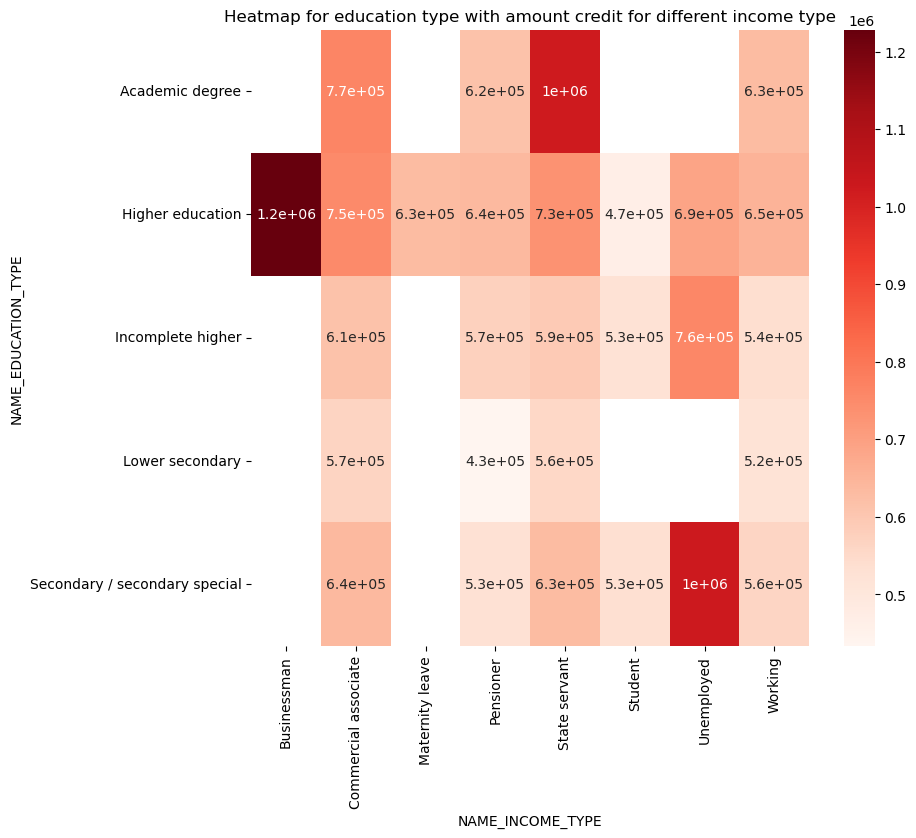

In [91]:
# Visualizing heatmap for the previous pivot table
e = pd.pivot_table(data = ad_t0, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_INCOME_TYPE', values = 'AMT_CREDIT' )
plt.figure(figsize =(9,8))
sns.heatmap(e, annot = True, cmap = 'Reds')
plt.title('Heatmap for education type with amount credit for different income type')
plt.show()

Conclusion on the above analysis:
    Businessman with Higher Education got the highest credit amount.

In [92]:
# Creating pivot table for index = 'CODE_GENDER', columns = 'ORGANIZATION_TYPE', values = 'AMT_CREDIT'
pd.pivot_table(data = ad_t0, index = 'CODE_GENDER', columns = 'ORGANIZATION_TYPE', values = 'AMT_CREDIT' )


ORGANIZATION_TYPE,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,...,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,Unknown
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,637073.351852,557971.859321,600277.843299,619461.441089,593999.579978,629656.317833,581217.129310,681953.736585,633426.723735,615883.729167,...,677825.488636,569764.227273,626086.066265,600854.600708,654462.915929,612689.621421,515229.982759,629562.911215,707798.082803,535278.810283
M,588872.145695,567710.583889,684412.959954,649343.900284,606172.972795,632016.422492,526902.315789,633456.104498,689525.866337,632069.851648,...,515019.000000,524353.500000,625433.754808,640403.370570,623453.354430,586503.776860,543434.674404,646960.213450,730526.723437,571786.107135


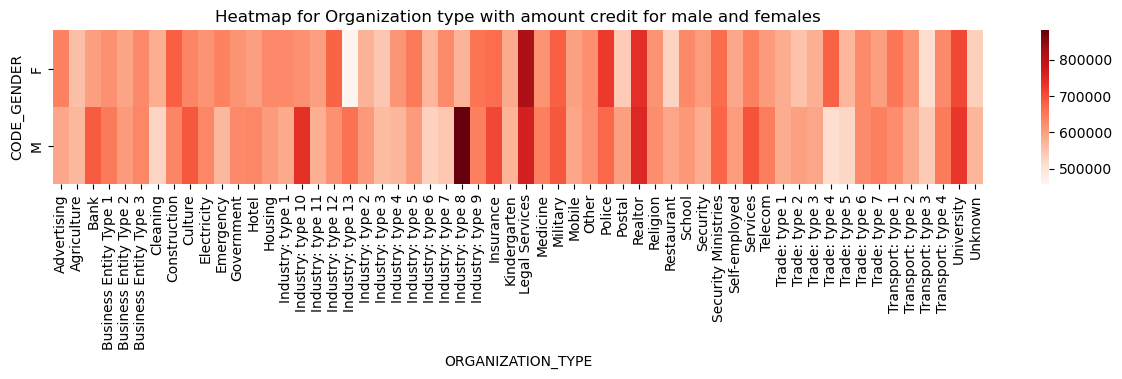

In [93]:
# Visualizing heatmap for the previous pivot table
plt.figure(figsize=(15,2))
f = pd.pivot_table(data = ad_t0, index = 'CODE_GENDER', columns = 'ORGANIZATION_TYPE', values = 'AMT_CREDIT' )
sns.heatmap(f, cmap = 'Reds')
plt.title('Heatmap for Organization type with amount credit for male and females')
plt.show()

Conclusion on the above analysis:
    'Industry: type 8' , 'Legal Service' ,'Realtor' & 'University' got the very high credit amount.

Here it has been tried to develop some conclusion refering TARGET = '0' and high value of 'AMT_CEDIT'
Following selections are the most profitable catagory respectively

1. 'NAME_INCOME_TYPE' = 'Businessman'
2. 'CODE_GENDER' = 'male'
3. 'NAME_EDUCATION_TYPE' = 'Higher education' & 'Academic Degree'
4. 'NAME_FAMILY_STATUS' = 'Married'
5. 'ORGANIZATION_TYPE' = 'Industry: type 8' , 'Legal Service' ,'Realtor' & 'University'


#  Conclusions

After performing the above analyis, it can be concluded that the following insights:

1. Females are the better option to approve the loan 
2. 'Business Entity Type 3' type persons are the best fitted organization for targeting
3. Person with Secondary / secondary special type of education are the best choice for targeting
4. More than 50 % people of the targeted person are working
5. Credit amount for the loan should be less than Rs.500000
6. Loan should be approved for those people who have income ranging between Rs.180000- Rs.210000
7. Loan Annuity between Rs.30000 - Rs.35000 is the best fitted case among all

As per the loan amount is concerned, the the below conclusions are made:
1. 'NAME_INCOME_TYPE' = 'Businessman'
2. 'CODE_GENDER' = 'male'
3. 'NAME_EDUCATION_TYPE' = 'Higher education' & 'Academic Degree'
4. 'NAME_FAMILY_STATUS' = 'Married'
5. 'ORGANIZATION_TYPE' = 'Industry: type 8' , 'Legal Service' ,'Realtor' & 'University'


#  Analysis on the data with 'TARGET' == '1'

In [94]:
# Finding the gender percentage for 'TARGET'= 1 type person
ad_t1.CODE_GENDER.value_counts(normalize=True)*100

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

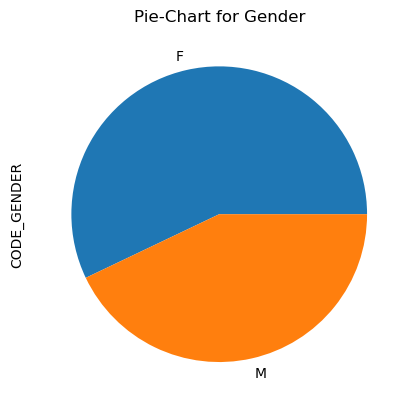

In [95]:
# Visualizing the proportion of gender percentage for 'TARGET'= 1 type person
ad_t1.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('Pie-Chart for Gender')
plt.show()

In [96]:
# Comapring the counts of Male and Female for both the Targets(0 and 1)
ad_t0.CODE_GENDER.value_counts()

F    188282
M     94404
Name: CODE_GENDER, dtype: int64

In [97]:
# Comapring the counts of Male and Female for both the Targets(0 and 1)
ad_t1.CODE_GENDER.value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

In [98]:
#  Finding the organization catagory percentage for 'TARGET'= 1 type person
ad_t1.ORGANIZATION_TYPE.value_counts(normalize = True)*100


Business Entity Type 3    25.470292
Self-employed             15.742195
Unknown                   12.044310
Other                      5.135952
Business Entity Type 2     3.625378
Construction               3.162135
Trade: type 7              2.980866
Medicine                   2.968781
Government                 2.924471
School                     2.118832
Transport: type 4          2.018127
Business Entity Type 1     1.961732
Kindergarten               1.949648
Trade: type 3              1.454179
Industry: type 3           1.401813
Security                   1.305136
Agriculture                1.035247
Housing                    0.946626
Industry: type 11          0.942598
Industry: type 9           0.906344
Restaurant                 0.853978
Transport: type 3          0.753273
Postal                     0.733132
Transport: type 2          0.692850
Military                   0.543807
Trade: type 2              0.535750
Bank                       0.523666
Police                     0

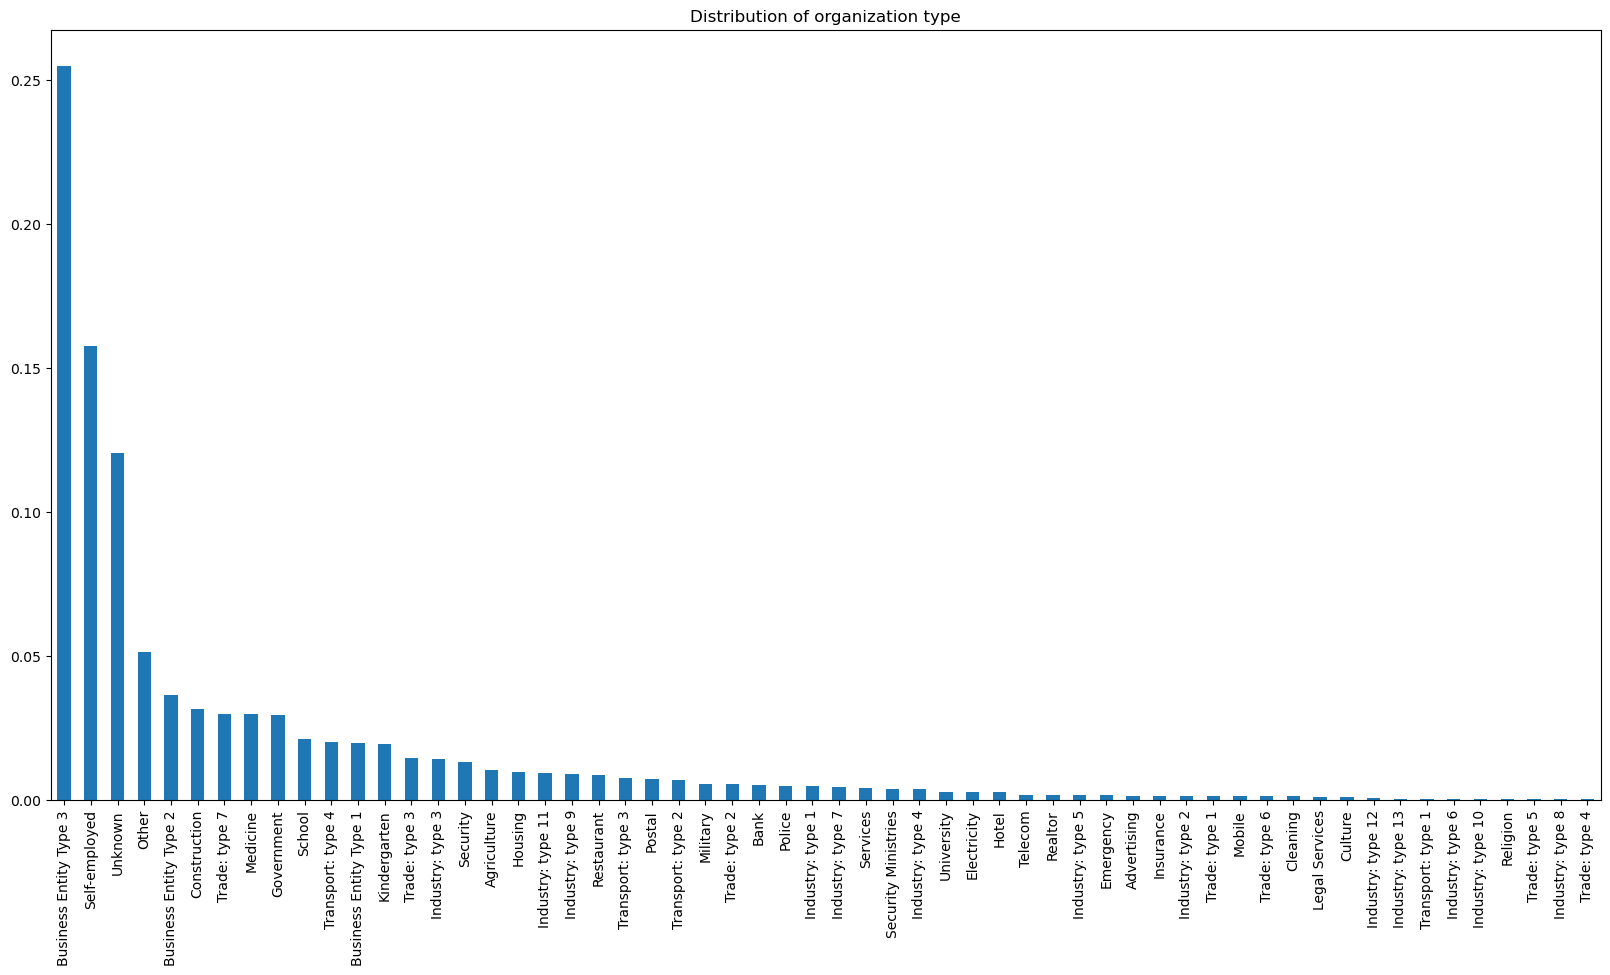

In [99]:
# Visualizing the organization catagory proportion for 'TARGET'= 1 type person
plt.figure(figsize = (20,10))
ad_t1.ORGANIZATION_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of organization type')
plt.show()


In [100]:
# Comapring the counts of Organization types for both the Targets(0 and 1)
ad_t0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    61669
Unknown                   52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

In [101]:
# Comapring the counts of Organization types for both the Targets(0 and 1)
ad_t1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    6323
Self-employed             3908
Unknown                   2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

In [102]:
# Finding the education catagory percentage for 'TARGET'= 1 type person
ad_t1.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100


Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

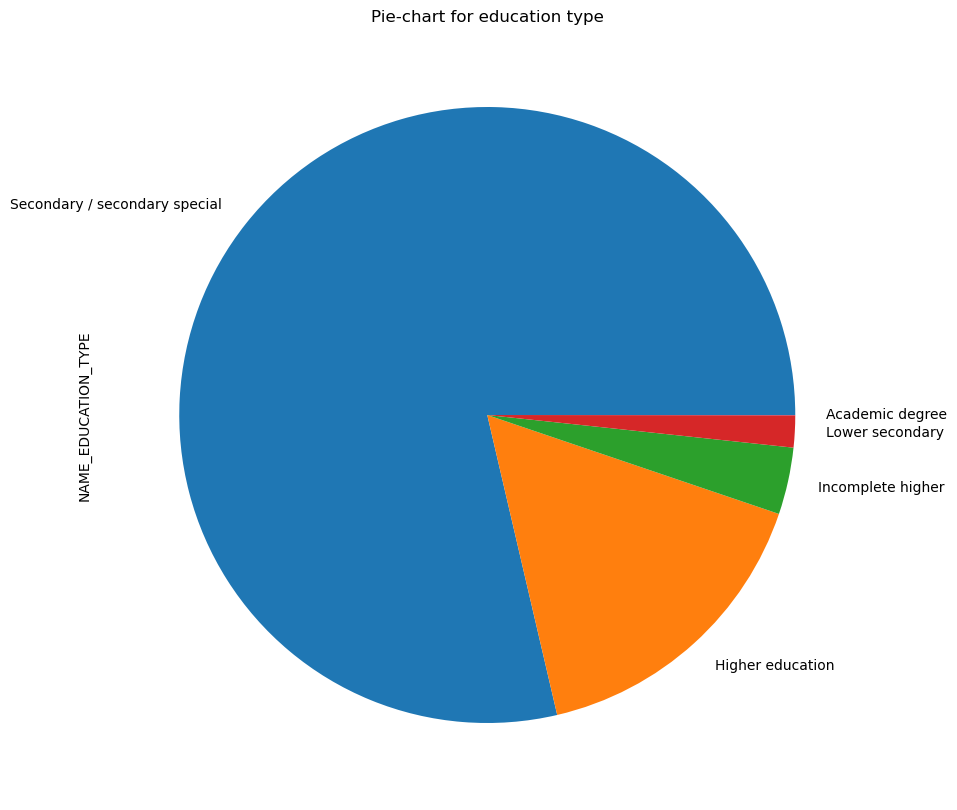

In [103]:
## Visualizing the education catagory proportion for 'TARGET'= 1 type person
plt.figure(figsize = (10,10))
ad_t1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.pie()
plt.title('Pie-chart for education type')
plt.show()


In [104]:
# Comapring the counts of education types for both the Targets(0 and 1)
ad_t0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

In [105]:
# Comapring the counts of education types for both the Targets(0 and 1)
ad_t1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

In [106]:
# Finding the income catagory percentage for 'TARGET'= 1 type person
ad_t1.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

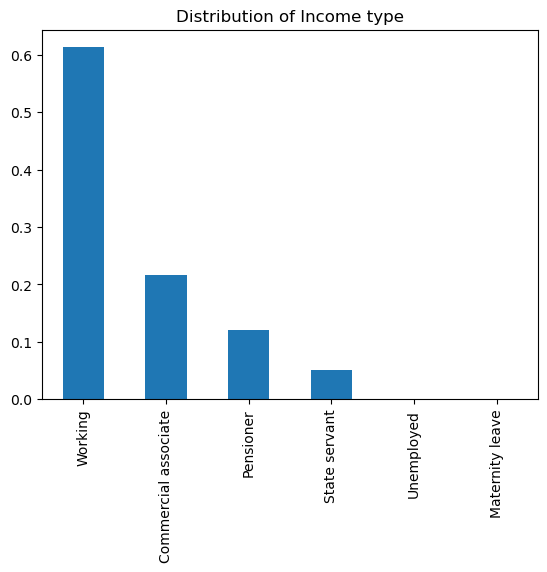

In [107]:
## Visualizing the income type catagory proportion for 'TARGET'= 1 type person
ad_t1.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of Income type')
plt.show


In [108]:
# Comapring the counts of income types for both the Targets(0 and 1)
ad_t0.NAME_INCOME_TYPE.value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [109]:
# Comapring the counts of income types for both the Targets(0 and 1)
ad_t1.NAME_INCOME_TYPE.value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [110]:
# Finding the amount credit range percentage for 'TARGET'= 1 type person
ad_t1.AMT_CREDIT_RANGE.value_counts(normalize = True)*100


270000 - 513531     29.421954
513531 - 808650     28.704935
<270000             22.880161
808650 - 1133748    12.426989
1133748+             6.565962
Name: AMT_CREDIT_RANGE, dtype: float64

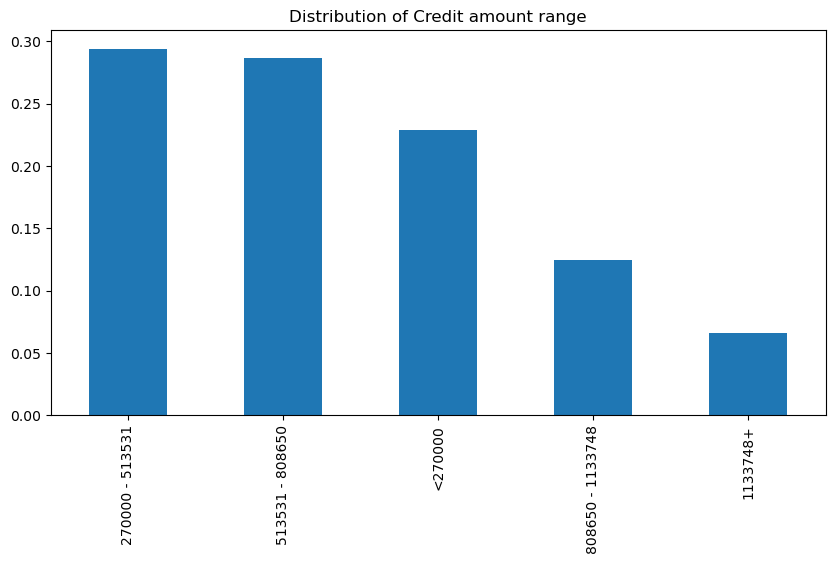

In [111]:
## Visualizing the amount credit range proportion for 'TARGET'= 1 type person
plt.figure(figsize = (10,5))
ad_t1.AMT_CREDIT_RANGE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of Credit amount range')
plt.show()


In [112]:
# Comapring the counts of credit ranges for both the Targets(0 and 1)
ad_t0.AMT_CREDIT_RANGE.value_counts()

<270000             72741
513531 - 808650     70660
270000 - 513531     68124
808650 - 1133748    42198
1133748+            28963
Name: AMT_CREDIT_RANGE, dtype: int64

In [113]:
# Comapring the counts of credit ranges for both the Targets(0 and 1)
ad_t1.AMT_CREDIT_RANGE.value_counts()

270000 - 513531     7304
513531 - 808650     7126
<270000             5680
808650 - 1133748    3085
1133748+            1630
Name: AMT_CREDIT_RANGE, dtype: int64

In [114]:
# Finding the income range percentage for 'TARGET'= 1 type person
ad_t1.AMT_INCOME_RANGE.value_counts(normalize = True)*100


180000-210000    26.465257
150000-180000    20.688822
120000-150000    17.856999
60000-90000      16.499496
90000,120000     15.919436
30000-60000       2.537764
0-30000           0.032226
Name: AMT_INCOME_RANGE, dtype: float64

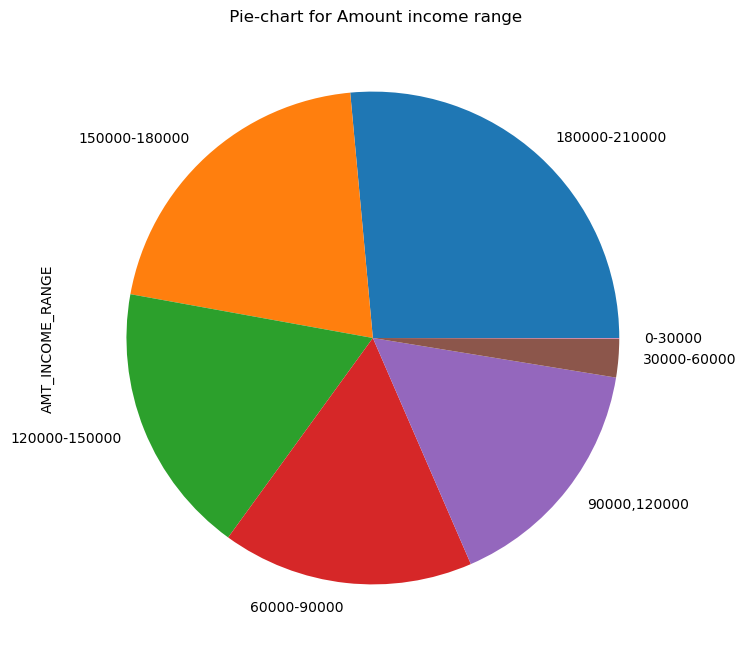

In [115]:
## Visualizing the income range proportion for 'TARGET'= 1 type person
plt.figure(figsize = (10,8))
ad_t1.AMT_INCOME_RANGE.value_counts(normalize = True).plot.pie()
plt.title(' Pie-chart for Amount income range')
plt.show()


In [116]:
# Comapring the counts of income ranges for both the Targets(0 and 1)
ad_t0.AMT_INCOME_RANGE.value_counts()

180000-210000    85357
150000-180000    55159
120000-150000    47519
60000-90000      45274
90000,120000     41463
30000-60000       7781
0-30000            133
Name: AMT_INCOME_RANGE, dtype: int64

In [117]:
# Comapring the counts of income ranges for both the Targets(0 and 1)
ad_t1.AMT_INCOME_RANGE.value_counts()

180000-210000    6570
150000-180000    5136
120000-150000    4433
60000-90000      4096
90000,120000     3952
30000-60000       630
0-30000             8
Name: AMT_INCOME_RANGE, dtype: int64

In [118]:
 ##Finding the amount annuity range percentage for 'TARGET'= 1 type person
ad_t1.AMT_ANNUITY_RANGE.value_counts(normalize = True)*100


30000 - 35000    34.171198
20000 - 25000    16.729104
25000 - 30000    16.535750
15000 - 20000    14.650554
10000 - 15000    11.266868
5000 - 10000      6.392749
< 5000            0.253776
Name: AMT_ANNUITY_RANGE, dtype: float64

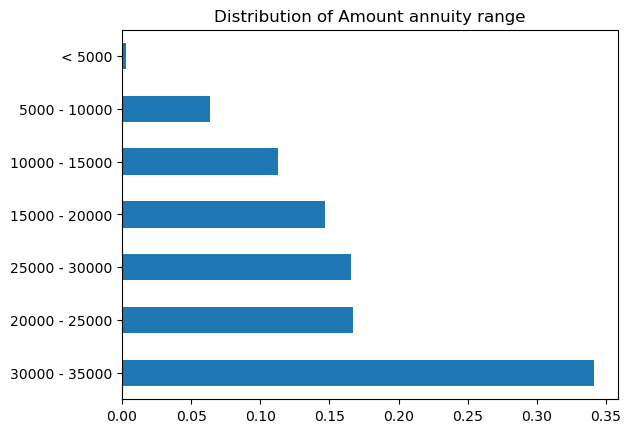

In [119]:
## Visualizing the amount annuity proportion for 'TARGET'= 1 type person
ad_t1.AMT_ANNUITY_RANGE.value_counts(normalize = True).plot.barh()
plt.title('Distribution of Amount annuity range')
plt.show()


In [120]:
# Comapring the counts of annuity ranges for both the Targets(0 and 1)
ad_t0.AMT_ANNUITY_RANGE.value_counts()

30000 - 35000    100045
20000 - 25000     44221
25000 - 30000     39999
15000 - 20000     39188
10000 - 15000     37600
5000 - 10000      20555
< 5000             1078
Name: AMT_ANNUITY_RANGE, dtype: int64

In [121]:
# Comapring the counts of annuity ranges for both the Targets(0 and 1)
ad_t1.AMT_ANNUITY_RANGE.value_counts()

30000 - 35000    8483
20000 - 25000    4153
25000 - 30000    4105
15000 - 20000    3637
10000 - 15000    2797
5000 - 10000     1587
< 5000             63
Name: AMT_ANNUITY_RANGE, dtype: int64

In [122]:
# Finding correlations for applicable columns for 'TARGET' = 1
ad_t1_cr=ad_t1.iloc[0:,2:]
g = ad_t1_cr.corr(method='spearman')
g

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.005540,0.000200,0.033589,-0.031628,0.267862,-0.116332,0.133658,-0.027320,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352
AMT_INCOME_TOTAL,-0.005540,1.000000,0.352495,0.416459,0.047910,-0.005111,-0.116520,0.035765,-0.006410,0.085883,0.073042,0.151717,0.141679,0.009011,0.030069,0.032781
AMT_CREDIT,0.000200,0.352495,1.000000,0.808096,0.039919,-0.155216,-0.083601,-0.017099,-0.053780,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182
AMT_ANNUITY,0.033589,0.416459,0.808096,1.000000,0.020595,-0.030226,-0.095645,0.035507,-0.014126,0.030762,0.028679,0.062340,0.061649,-0.002419,0.007992,0.015552
REGION_POPULATION_RELATIVE,-0.031628,0.047910,0.039919,0.020595,1.000000,-0.046398,-0.003635,-0.034315,-0.023668,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447
DAYS_BIRTH,0.267862,-0.005111,-0.155216,-0.030226,-0.046398,1.000000,-0.107174,0.232940,0.251626,0.065810,0.055835,0.064540,0.039911,0.165372,0.203415,0.108966
DAYS_EMPLOYED,-0.116332,-0.116520,-0.083601,-0.095645,-0.003635,-0.107174,1.000000,-0.017716,-0.049799,-0.027246,0.037032,0.016830,0.002150,0.046567,-0.025656,-0.055327
DAYS_REGISTRATION,0.133658,0.035765,-0.017099,0.035507,-0.034315,0.232940,-0.017716,1.000000,0.095750,-0.032019,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747
DAYS_ID_PUBLISH,-0.027320,-0.006410,-0.053780,-0.014126,-0.023668,0.251626,-0.049799,0.095750,1.000000,0.026347,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407
HOUR_APPR_PROCESS_START,-0.022469,0.085883,0.028537,0.030762,0.105989,0.065810,-0.027246,-0.032019,0.026347,1.000000,0.048070,0.065472,0.052126,0.007850,0.019658,0.014637


<AxesSubplot:xlabel='ORGANIZATION_TYPE', ylabel='CODE_GENDER'>

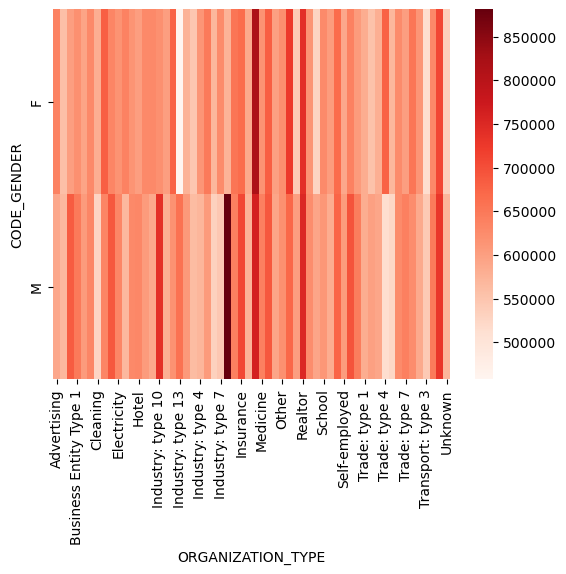

In [123]:
f = pd.pivot_table(data = ad_t0, index = 'CODE_GENDER', columns = 'ORGANIZATION_TYPE', values = 'AMT_CREDIT' )
sns.heatmap(f, cmap = 'Reds')

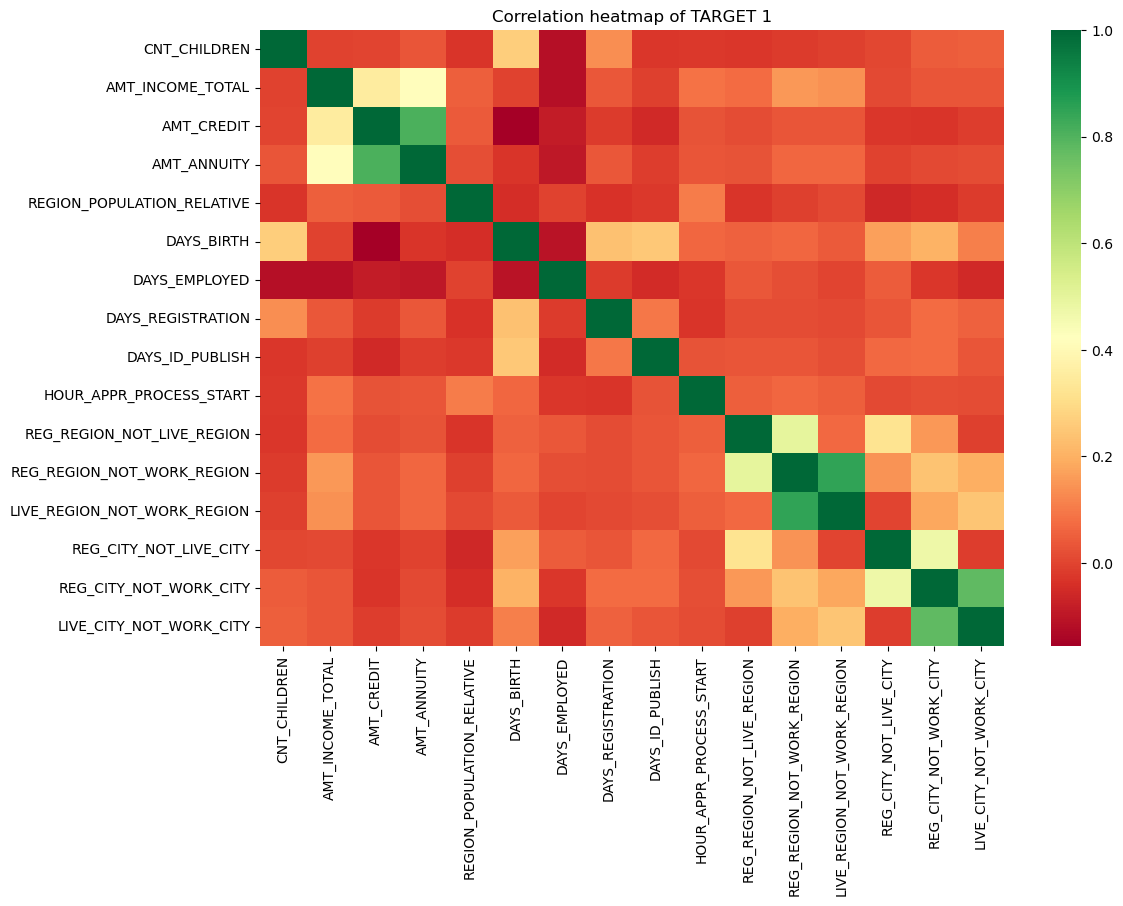

In [124]:
plt.figure(figsize = (12,8))
sns.heatmap(g, cmap="RdYlGn")
plt.title('Correlation heatmap of TARGET 1')
plt.show()


After analysis the 'TARGET' = 1 category type data, the following insights can be stated:

1. 57 % of the person those are in 'TARGET' = 1, are female but as per the counting concerns  Females are the better choice than male.  

2. Though more than one fourth persons in 'TARGET' = 1 are belong to Business Entity Type 3, it remain the best choice of organization.

3. 78 % have education qualification is Secondary/ secondary special in 'TARGET' = 0 database, but it remains the best choice.

4. Counting of different income type gives working persons are the best choice in different income categories.

5. lower credit reduces the risk.

6. 18000 - 21000 range of income gives the maximum risk among all ranges, but it remain the best choice for approving the loan.

7. Similarly 30000 - 35000 remain the best choice of annuity range.

8. Correlation matrix and heatmap results very much similar insights as the insights generated for correlation matrix of 'TARGET' = 0 data.



In [125]:
# read the data set of "previous application" in ad.
pa = pd.read_csv("previous_application.csv")

In [126]:
# Checking the head of 'pa'
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# checking the shape of 'pa'
pa.shape

(1670214, 37)

In [128]:
# Checking the columns for null percentage
pa_coll = pa.isna().sum()/len(pa)*100
pa_coll

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [129]:
# checking the columns having high null value(more than 25%) 
pa_coll_n=list(pa_coll[pa_coll.values>=25].index)
len(pa_coll_n)

11

In [130]:
#dropping the pa_coll_n columns
pa.drop(labels=pa_coll_n,axis=1,inplace=True)
pa.shape

(1670214, 26)

In [131]:
# checking the head of pa after dropping 11 columns
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [132]:
# Removing the column values of 'XNA' and 'XAP'

pa=pa.drop(pa[pa['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

pa=pa.drop(pa[pa['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


pa.shape

(69635, 26)

In [133]:
# checking the info of 'pa'
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_ANNUITY                  69372 non-null  float64
 4   AMT_APPLICATION              69635 non-null  float64
 5   AMT_CREDIT                   69635 non-null  float64
 6   AMT_GOODS_PRICE              69635 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 8   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 12  NAME_CONTRACT_STATUS         69635 non-null  object 
 13  DAYS_DECISION 

In [134]:
# checking the missing values of each columns
pa.isna().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                    263
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

In [135]:
# checking the statistical data of all numerical columns
pa.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,6.963500e+04,69635.000000,69372.000000,6.963500e+04,6.963500e+04,6.963500e+04,69635.000000,69635.000000,69635.000000,69635.000000,69372.000000
mean,1.935842e+06,278555.901084,25682.780030,4.533566e+05,5.096662e+05,4.533566e+05,12.180125,0.999081,-648.234164,9.132419,29.640849
std,5.300383e+05,103065.139046,17426.515193,4.917079e+05,5.371849e+05,4.917079e+05,3.217940,0.030303,534.865018,128.160557,17.666787
min,1.000125e+06,100034.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2465.000000,-1.000000,5.000000
25%,1.481020e+06,189482.000000,13595.175000,1.350000e+05,1.528200e+05,1.350000e+05,10.000000,1.000000,-707.000000,-1.000000,12.000000
50%,1.942746e+06,279260.000000,21368.250000,2.700000e+05,3.065310e+05,2.700000e+05,12.000000,1.000000,-506.000000,-1.000000,24.000000
75%,2.393264e+06,368506.000000,32681.250000,6.075000e+05,6.750000e+05,6.075000e+05,15.000000,1.000000,-313.000000,0.000000,48.000000
max,2.845265e+06,456255.000000,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,23.000000,1.000000,-2.000000,12102.000000,60.000000


In [136]:
# checking the head again
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low


In [137]:
# Finding the different methods of loan contract
pa.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans    1.0
Name: NAME_CONTRACT_TYPE, dtype: float64

In [138]:
# Finding the percentage of different purpose of cash loan
pa.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100

Repairs                             34.127953
Other                               22.414016
Urgent needs                        12.080132
Buying a used car                    4.147340
Building a house or an annex         3.867308
Everyday expenses                    3.469520
Medicine                             3.121993
Payments on other loans              2.773031
Education                            2.258922
Journey                              1.779278
Purchase of electronic equipment     1.523659
Buying a new car                     1.453292
Wedding / gift / holiday             1.381489
Buying a home                        1.242191
Car repairs                          1.144539
Furniture                            1.075609
Buying a holiday home / land         0.765420
Business development                 0.611761
Gasification / water supply          0.430818
Buying a garage                      0.195304
Hobby                                0.078983
Money for a third person          

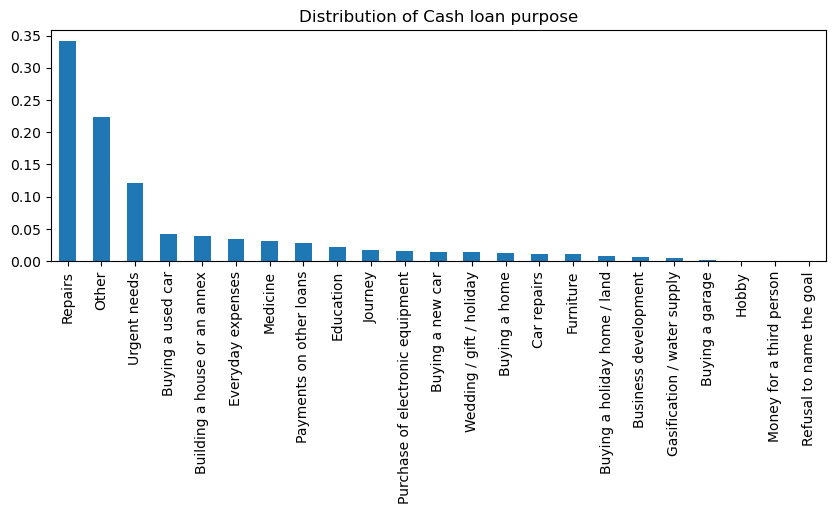

In [139]:
# Visualizing the different purpose of cash loan
plt.figure(figsize = (10,3))
pa.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True).plot.bar()
plt.title('Distribution of Cash loan purpose')
plt.show()

In [140]:
# Finding the percentage of different payment type
pa.NAME_PAYMENT_TYPE.value_counts(normalize = True)*100

Cash through the bank                        91.670855
XNA                                           7.777698
Non-cash from your account                    0.459539
Cashless from the account of the employer     0.091908
Name: NAME_PAYMENT_TYPE, dtype: float64

There are 7.77 % 'XNA' in 'NAME_PAYMENT_TYPE' columns and need to be marked as 'Unknown'

In [141]:
# Marking those 'XNA' values with 'Unknown'
pa.loc[pa.NAME_PAYMENT_TYPE == "XNA", "NAME_PAYMENT_TYPE"] = "Unknown"

In [142]:
# Finding the percentage of different payment method again
pa.NAME_PAYMENT_TYPE.value_counts(normalize = True)*100

Cash through the bank                        91.670855
Unknown                                       7.777698
Non-cash from your account                    0.459539
Cashless from the account of the employer     0.091908
Name: NAME_PAYMENT_TYPE, dtype: float64

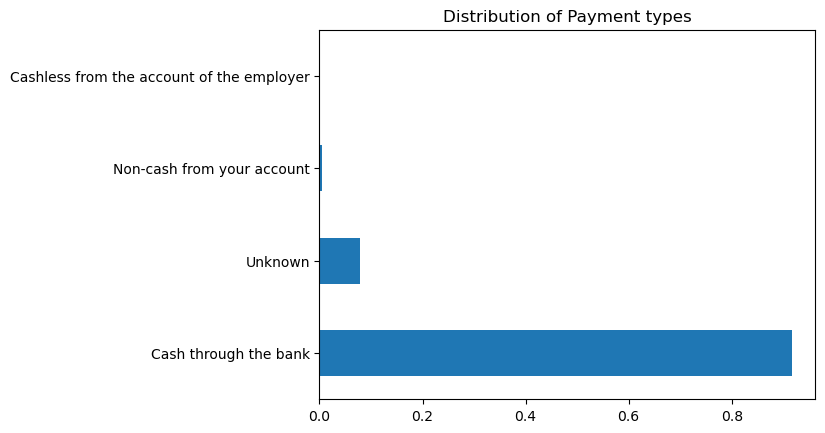

In [143]:
# visualize the percentage of different payment method
pa.NAME_PAYMENT_TYPE.value_counts(normalize = True).plot.barh()
plt.title('Distribution of Payment types')
plt.show()

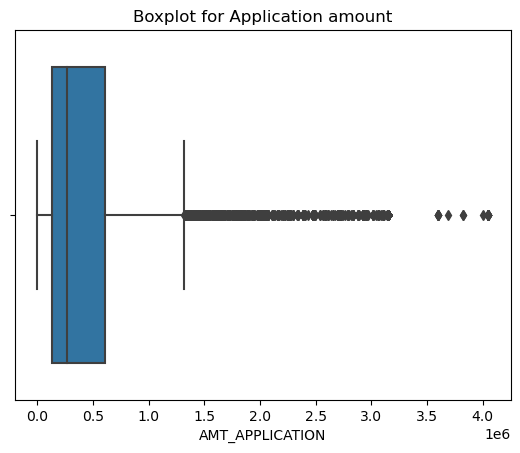

In [144]:
# Checking the outliers for the amount of credit of previous application 
sns.boxplot(pa.AMT_APPLICATION)
plt.title('Boxplot for Application amount')
plt.show()

In [145]:
# Capping outliers for AMT_INCOME_TOTAL
h = pa.AMT_APPLICATION.quantile(0.9)
pa["AMT_APPLICATION"] = pa["AMT_APPLICATION"].apply(lambda x: h if x> h else x)


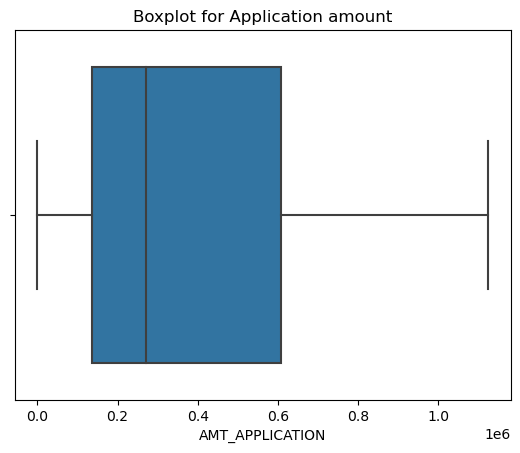

In [146]:
# Again Checking the outliers for the amount of credit aksed in previous application
sns.boxplot(pa.AMT_APPLICATION)
plt.title('Boxplot for Application amount')
plt.show()

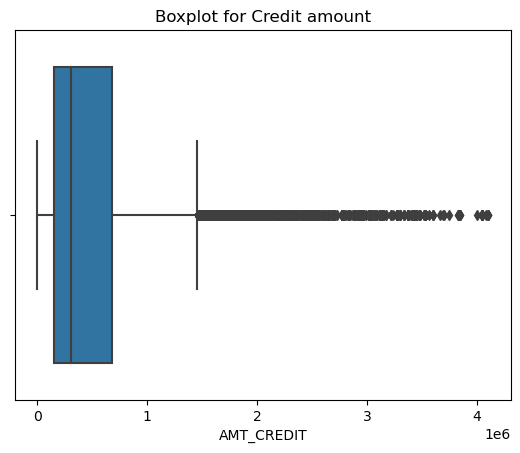

In [147]:
# Checking the outliers for the final amount of credit of previous application
sns.boxplot(pa.AMT_CREDIT)
plt.title('Boxplot for Credit amount')
plt.show()


In [148]:
# Capping outliers for AMT_INCOME_TOTAL
i = pa.AMT_CREDIT.quantile(0.9)
pa["AMT_CREDIT"] = pa["AMT_CREDIT"].apply(lambda x: i if x> i else x)


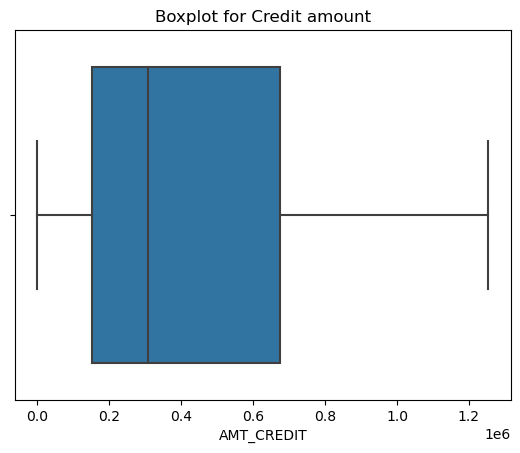

In [149]:
# Again Checking the outliers for the final amount of credit of previous application
sns.boxplot(pa.AMT_CREDIT)
plt.title('Boxplot for Credit amount')
plt.show()

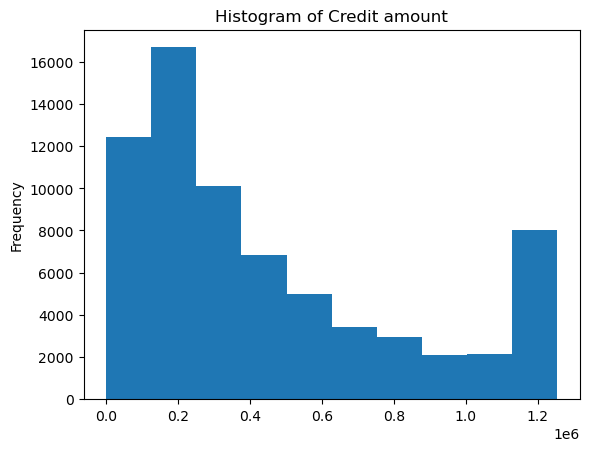

In [150]:
# visualizing the histogram for "Credit Amount"
pa.AMT_CREDIT.plot.hist()
plt.title('Histogram of Credit amount')
plt.show()

In [151]:
# Checking the statistical data of Credit amount aksed in previous application
pa.AMT_APPLICATION.describe()

count    6.963500e+04
mean     4.029995e+05
std      3.445555e+05
min      0.000000e+00
25%      1.350000e+05
50%      2.700000e+05
75%      6.075000e+05
max      1.125000e+06
Name: AMT_APPLICATION, dtype: float64

In [152]:
# Checking the different groups of interest rate
pa.NAME_YIELD_GROUP.value_counts(normalize = True)*100

high          40.853019
middle        26.047246
low_normal    25.604940
low_action     7.117111
XNA            0.377684
Name: NAME_YIELD_GROUP, dtype: float64

There are few group of interest rate having 'XNA' marking.
Those values should be replaced by the mode of the data

In [153]:
# Replacing 'XNA' with mode of the data
j = pa.NAME_YIELD_GROUP.mode()[0]
pa.loc[pa.NAME_YIELD_GROUP == "XNA", "NAME_YIELD_GROUP"] = j

In [154]:
# Again Checking the different groups of interest rate
pa.NAME_YIELD_GROUP.value_counts(normalize = True)*100

high          41.230703
middle        26.047246
low_normal    25.604940
low_action     7.117111
Name: NAME_YIELD_GROUP, dtype: float64

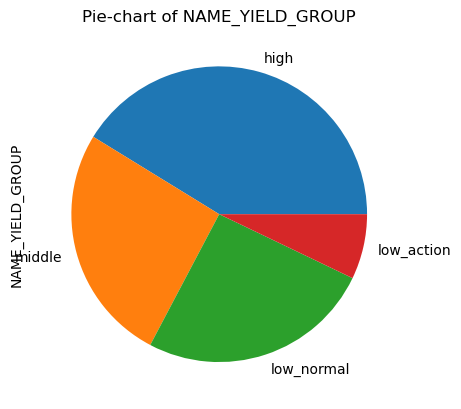

In [155]:
# Visualizing the different groups of interest rate
pa.NAME_YIELD_GROUP.value_counts(normalize = True).plot.pie()
plt.title('Pie-chart of NAME_YIELD_GROUP')
plt.show()

In [156]:
# Analyze the different loan purpose with different interest rates
pa.groupby("NAME_YIELD_GROUP")["NAME_CASH_LOAN_PURPOSE"].value_counts()

NAME_YIELD_GROUP  NAME_CASH_LOAN_PURPOSE     
high              Repairs                        7975
                  Other                          7919
                  Urgent needs                   4297
                  Everyday expenses              1735
                  Medicine                       1320
                                                 ... 
middle            Gasification / water supply      61
                  Buying a garage                  34
                  Hobby                            20
                  Money for a third person          6
                  Refusal to name the goal          1
Name: NAME_CASH_LOAN_PURPOSE, Length: 90, dtype: int64

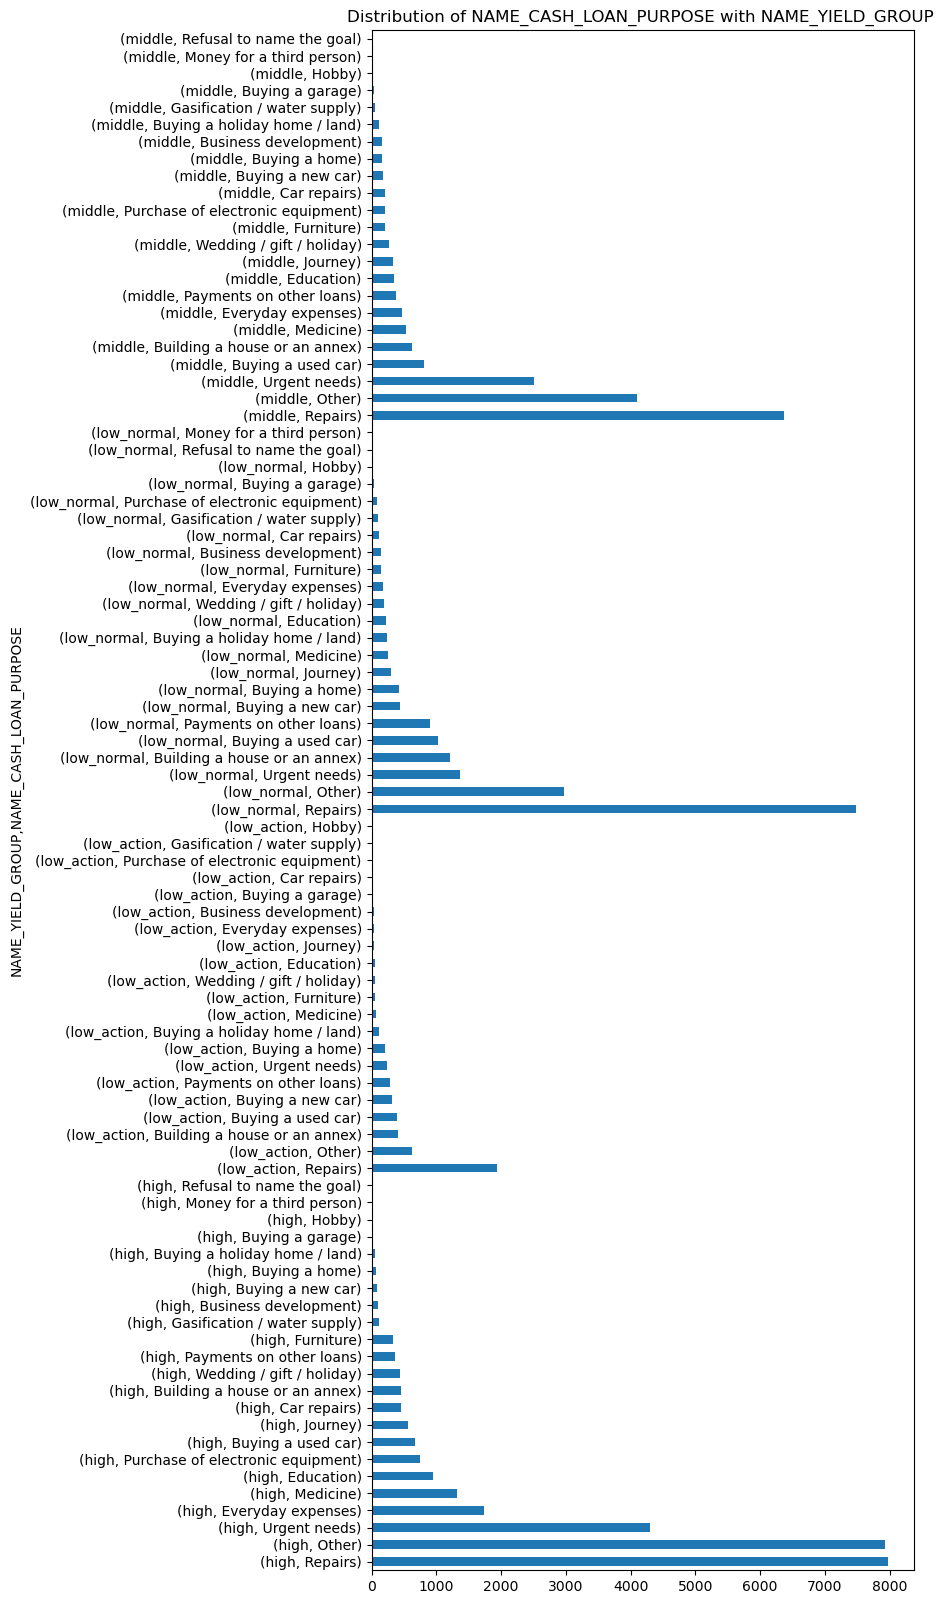

In [157]:
# Visualizing the different loan purpose with different interest rates
plt.figure(figsize=[7,20])

pa.groupby("NAME_YIELD_GROUP")["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.barh()
plt.title('Distribution of NAME_CASH_LOAN_PURPOSE with NAME_YIELD_GROUP ')
plt.show()

# Conclusion
Based on the above analysis made on Previous application data. the following insights can be generated:

1. All the contracts were of Cash loan type

2. 34 % of previous loan due to Repairing 

3. 91 % payment was done by cash through the bank

4. Maximum credit amount range was between 100000 to 200000

5. More than 40 % of the loan was with the high rate

6. Loan for repairing gave the maximum interest


In [158]:
# Marging 'ad' & 'pa' in a common dataframe (df)
df=pd.merge(left=ad,right=pa,how='inner',on='SK_ID_CURR')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,202500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,202500.0,733315.5,34596.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [159]:
# Checking the shape of 'df'
df.shape

(59413, 56)

In [160]:
# Finding the info of 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   SK_ID_CURR                    59413 non-null  int64   
 1   TARGET                        59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          59413 non-null  object  
 3   CODE_GENDER                   59413 non-null  object  
 4   FLAG_OWN_CAR                  59413 non-null  object  
 5   FLAG_OWN_REALTY               59413 non-null  object  
 6   CNT_CHILDREN                  59413 non-null  int64   
 7   AMT_INCOME_TOTAL              59413 non-null  float64 
 8   AMT_CREDIT_x                  59413 non-null  float64 
 9   AMT_ANNUITY_x                 59413 non-null  float64 
 10  NAME_INCOME_TYPE              59413 non-null  object  
 11  NAME_EDUCATION_TYPE           59413 non-null  object  
 12  NAME_FAMILY_STATUS            59413 non-null  

In [161]:
# Checking for missing values
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT_x                      0
AMT_ANNUITY_x                     0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
WEEKDAY_APPR_PROCESS_START_x      0
HOUR_APPR_PROCESS_START_x         0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE           

In [162]:
# Checking the percentage of missing values in each columns
k = df.isna().sum()/len(df)
k*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
WEEKDAY_APPR_PROCESS_START_x    0.000000
HOUR_APPR_PROCESS_START_x       0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIV

Only 'AMT_ANNUITY_y' & 'CNT_PAYMENT' have  missing values, but it is less than 1 %, thus can be dropped

In [163]:
# Dropping those rows having missing values in 'AMT_ANNUITY_y' & 'CNT_PAYMENT'
df = df[~(df.AMT_ANNUITY_y.isna())]
df = df[~(df.CNT_PAYMENT.isna())]

In [164]:
# Checking the missing value again
df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
AMT_INCOME_RANGE                0
AMT_CREDIT_RAN

In [165]:
# Checking the different Cash loan purpose with respect to 'TARGET'
df.groupby("TARGET")["NAME_CASH_LOAN_PURPOSE"].value_counts()

TARGET  NAME_CASH_LOAN_PURPOSE          
0       Repairs                             17449
        Other                               11676
        Urgent needs                         6147
        Buying a used car                    2137
        Building a house or an annex         2020
        Everyday expenses                    1817
        Medicine                             1615
        Payments on other loans              1319
        Education                            1189
        Journey                               927
        Purchase of electronic equipment      812
        Buying a new car                      801
        Wedding / gift / holiday              704
        Buying a home                         617
        Furniture                             575
        Car repairs                           564
        Buying a holiday home / land          408
        Business development                  312
        Gasification / water supply           206
        B

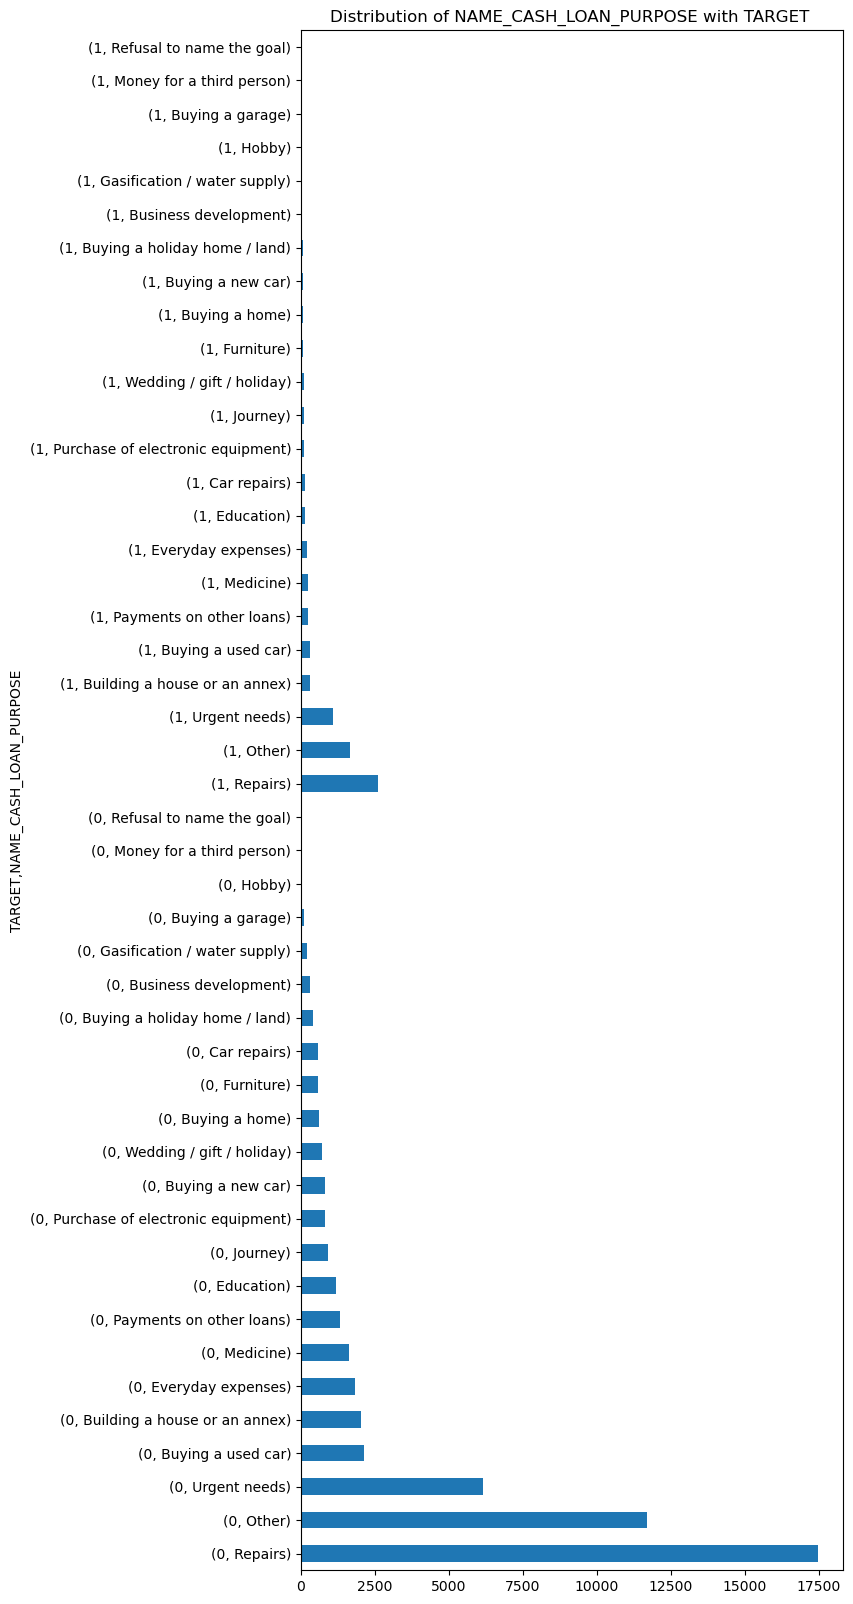

In [166]:
# Visualizing the different Cash loan purpose with respect to 'TARGET'
plt.figure(figsize=[7,20])
df.groupby("TARGET")["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.barh()
plt.title('Distribution of NAME_CASH_LOAN_PURPOSE with TARGET ')
plt.show()


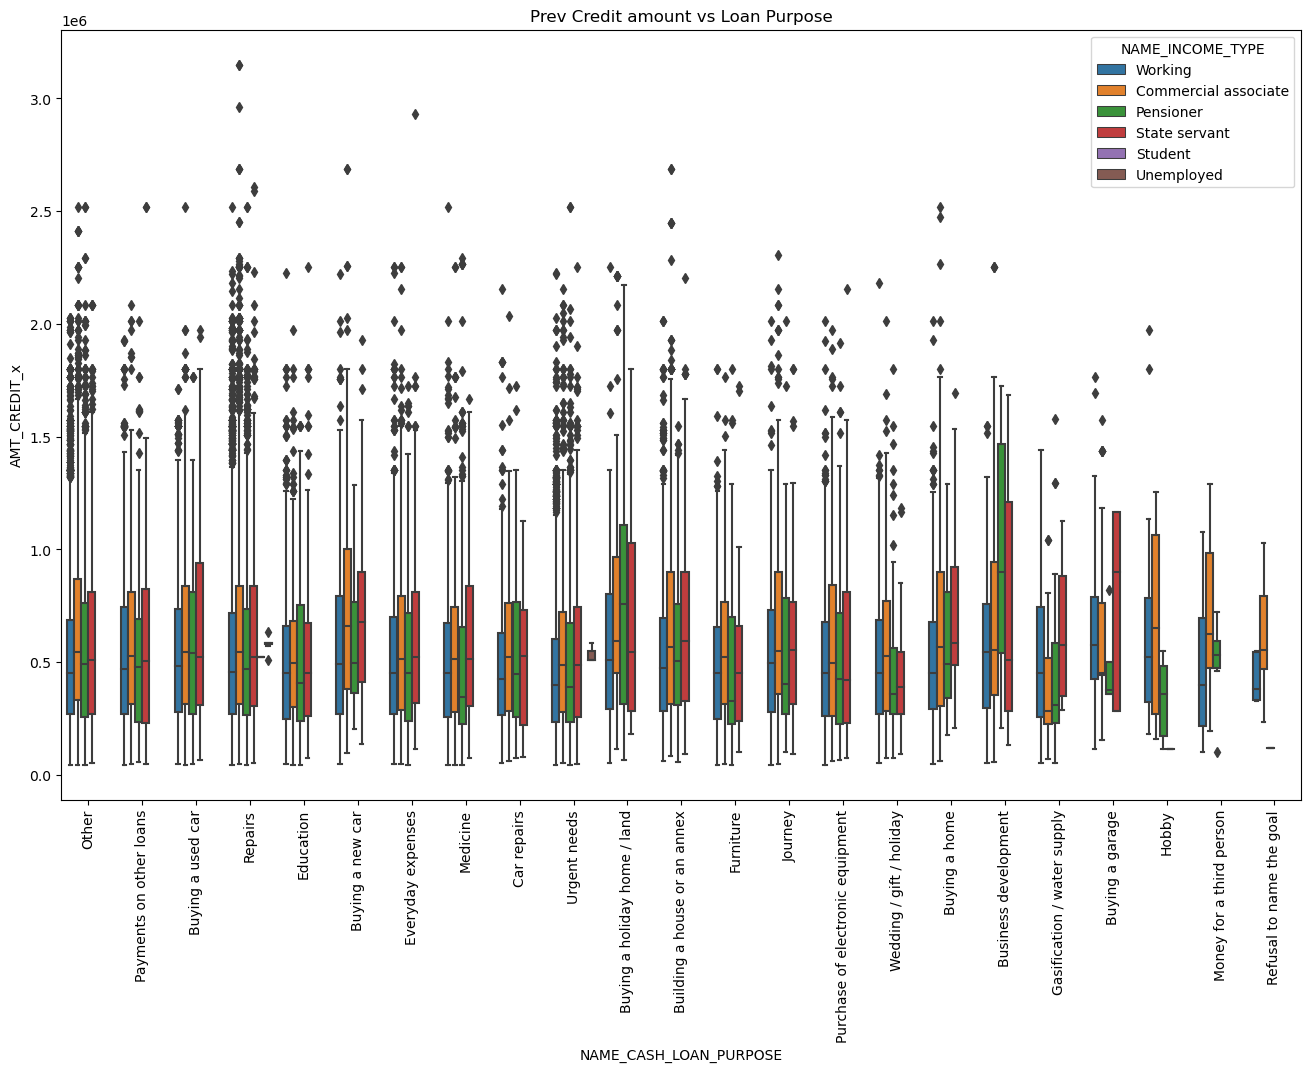

In [167]:
# Visualizing the boxplot for Credit amount with respect to Credit amaount for different incomes
plt.figure(figsize=[16,10])
plt.xticks(rotation=90)
sns.boxplot(data =df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

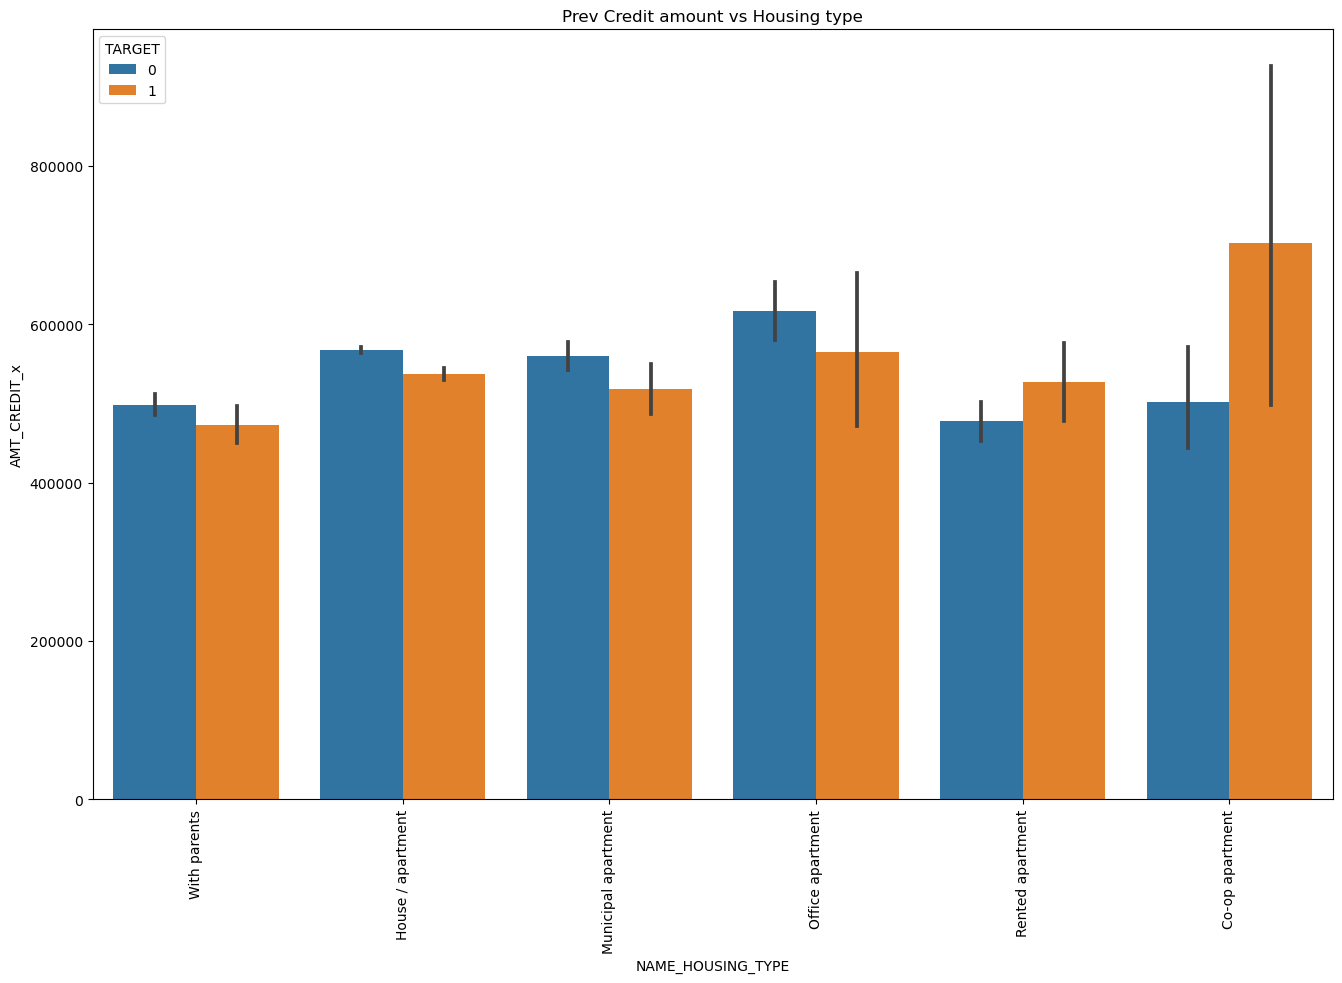

In [168]:
# Visualizing the relation between Credit amount prev and Housing type for both the 'TARGET'

plt.figure(figsize=[16,10])
plt.xticks(rotation=90)
sns.barplot(data =df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

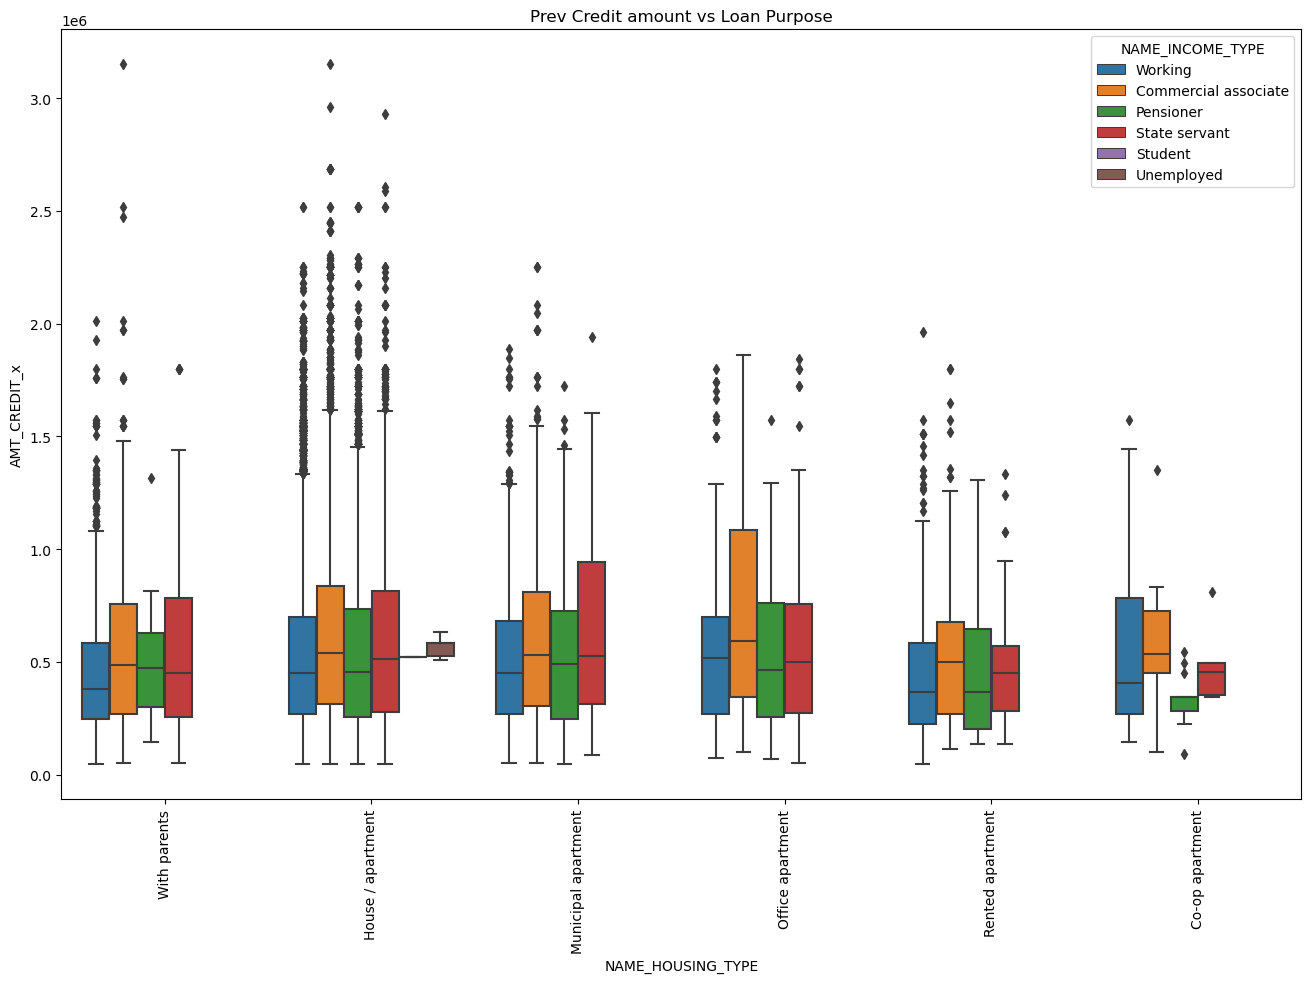

In [169]:
# Visualizing the boxplot for Credit amount with respect to Credit amaount for different incomes
plt.figure(figsize=[16,10])
plt.xticks(rotation=90)
sns.boxplot(data =df, x='NAME_HOUSING_TYPE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Conclusions made after analyzing the marged database:

    1. Repairing is the most common reason for applying for Loan
    
    2. The credit amount of Loan for the following reasons is higher:
    'Buying a home','Buying a land','Buying a new car' and'Building a house'.
    
    3. Income type of state servants have a very high credit amount.
    
    4. Office apartment type housing has the most TARGET 0 and Co-op    
    apartment type of housing has the most TARGET 1.

# Overall Conclusion

1. Persons with Secondary / secondary special type of education are the best choice for targeting.

2. Those who are applying loan for repairing should be treated as most succesful persons.

3. Bank should focus on 'Business Entity Type 3' & 'Self-employed' as organization type for successful payment.

4. Bank should focus on 'students', 'Businessmen' and 'pensioners' with 'Office apartment' , 'Municipal apartment' & 'House/apartment' as housing.

5. Higher credit generates risk of unsuccessful payments thus amount for the loan should be less than Rs.500000